# Car Price Prediction Project

### Problem Statement

#### Submitted By Razni Nazeem(Internship 26, FlipRobo Technologies)

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-
1. Data Collection Phase
1. Model Building Phase

**DataCollection Phase**

In this section We need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.). We need web scraping for this. We have to fetch data for different locations. 

**Model Building Phase**

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

I have Included complete life cycle of data science. 

1. DataCleaning
2. Exploratory Data Analysis
3. DataPre-processing
4. ModelBuilding
5. ModelEvaluation
6. Selectingthebestmodel



## Loading Dataset and Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

**I have scraped cars from cars24.com. The data is scraped on July,2022**

In [2]:
df=pd.read_excel("cars24.com.xlsx")
pd. set_option('display.max_columns', 500)#to display more columns
df

,City,Car Full Name,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max power RPM,Max tourque NM,Max tourque RPM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Price,Mileage,Kilometer driven,History
0,Gurgaon,2014 MARUTI WAGON R 1.0 VXI MANUAL,Maruti Wagon R 1.0,MARUTI,WAGON R 1.0,VXI,2014,MANUAL,NaN,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,2,281899,NaN,86996,Non-Accidental
1,Gurgaon,2010 HONDA CITY S MT PETROL MANUAL,Honda City,HONDA,CITY,S MT PETROL,2010,MANUAL,118,NaN,146,NaN,Petrol,42,"4 , Inline",5,1,413999,11.6,39307,Non-Accidental
2,Gurgaon,2019 MG HECTOR SHARP DCT PETROL AUTOMATIC,MG HECTOR,MG,HECTOR,SHARP DCT PETROL,2019,AUTOMATIC,141,NaN,250,NaN,Petrol,60,"4 , Inline",5,1,1790199,13.96,8717,Non-Accidental
3,Gurgaon,2019 MG HECTOR SHARP 2.0 DIESEL MANUAL,MG HECTOR,MG,HECTOR,SHARP 2.0 DIESEL,2019,MANUAL,169,NaN,350,NaN,Diesel,60,"4 , Inline",5,1,1557099,17.41,49413,Non-Accidental
4,Gurgaon,2013 HYUNDAI I20 ERA 1.4 CRDI MANUAL,Hyundai i20,HYUNDAI,I20,ERA 1.4 CRDI,2013,MANUAL,90,NaN,220,NaN,Diesel,45,"4 , Inline",5,1,306299,14.9,29974,Non-Accidental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9171,Kanpur,2014 MARUTI SWIFT VXI MANUAL,Maruti Swift,MARUTI,SWIFT,VXI,2014,MANUAL,83,6000.0,115,4000,Petrol,42,"4, Inline",5,1,334299,20.4,171171,Non-Accidental
9172,Kanpur,2018 MARUTI SWIFT DZIRE TOUR S DIESEL MANUAL,Maruti Swift Dzire,MARUTI,SWIFT DZIRE,TOUR S DIESEL,2018,MANUAL,85,6000.0,114,4000,Diesel,42,"4, Inline",5,1,440099,19.1,98198,Non-Accidental
9173,Kanpur,2012 MARUTI SWIFT DZIRE VDI BS IV MANUAL,Maruti Swift Dzire,MARUTI,SWIFT DZIRE,VDI BS IV,2012,MANUAL,75,4000.0,190,2000,Diesel,43,NaN,5,1,351599,14,123014,Non-Accidental
9174,Kanpur,2020 HYUNDAI VERNA 1.6 SX (O) AT CRDI AUTOMATIC,Hyundai Verna,HYUNDAI,VERNA,1.6 SX (O) AT CRDI,2020,AUTOMATIC,126,NaN,260,NaN,Diesel,45,"4 , Inline",5,1,1324699,21.02,30448,Non-Accidental


**My dataset contains used cars from 11 cities Ahmedabad, Gurgaon,Kanpur,Bengaluru, Chennai, Hyderabad, Kolkata, Mumbai, New delhi, Noida and Pune**

## Exploratory Data Analysis

### 1. Data Exploration

In [3]:
df.shape

(9176, 21)

#### My dataset has 9176 rows and 21 columns

In [4]:
#Lets check the columns

df.columns

Index(['City', 'Car Full Name', 'Car Name', 'Brand', 'Model', 'Variant',
       'Year', 'Transmission', 'Max power BHP', 'Max power RPM',
       'Max tourque NM', 'Max tourque RPM', 'Fuel Type', 'Fuel tank capacity',
       'Cylinders', 'Seating capacity', 'Owner number', 'Price', 'Mileage',
       'Kilometer driven', 'History'],
      dtype='object')

Above are the columns I scraped for my model building

### Variable Description

1. **City**- Which City car is available at
1. **Car Full name**- The full car name including Brand, Variant, Model
1. **Car Name**- Name of the Car
1. **Brand**- Which brand the car belong to
1. **Model**- Which model car
1. **Variant**- label describing the vehicle such as engine size, no. of doors, version etc
1. **Year**- Which Year car was built
1. **Trasmission**- Whether Automatic or Manual
1. **Max power BHP**- Maximum Power engine can deliver to its crankshaft
1. **Max power RPM**- How many times the engine's crankshaft makes one full rotation every minute
1. **Max torque NM**- the pull what you actually feel when you’re pushed back into your seat on acceleration
1. **Max torque RPM**- how much twisting force is available at the crankshaft at any given engine revs (RPM)
1. **Fuel Type**- Petrol, Diesel, Electric or Gas
1. **Fuel Tank Capacity**- How much fuel can be stored full tank
1. **Cylinders**- 4,6 or 8 cylinders 
1. **Seating Capacity**- How many passengers can be accomodated including driver
1. **Owner number**- Whether 1st owner, second owner or nth owner.
1. **Price**- Price of the car
1. **Mileage**- How many kilometers can be covered per litre of fuel
1. **Kilometer driven**- Total distance travelled the car had travelled in kms
1. **History**- Any type of accidents or not

In [5]:
#Checking more information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176 entries, 0 to 9175
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                9176 non-null   object 
 1   Car Full Name       9176 non-null   object 
 2   Car Name            9176 non-null   object 
 3   Brand               9176 non-null   object 
 4   Model               9176 non-null   object 
 5   Variant             9176 non-null   object 
 6   Year                9176 non-null   int64  
 7   Transmission        9024 non-null   object 
 8   Max power BHP       8045 non-null   object 
 9   Max power RPM       2921 non-null   float64
 10  Max tourque NM      6864 non-null   object 
 11  Max tourque RPM     4102 non-null   object 
 12  Fuel Type           9176 non-null   object 
 13  Fuel tank capacity  8024 non-null   object 
 14  Cylinders           7745 non-null   object 
 15  Seating capacity    8045 non-null   object 
 16  Owner 

**Observations**

* As we can see Most of the data is in Object type. 
* We have 1 float type, 4 Int type and 16 Object type.
* We have many missing values in a fewe columns

In [6]:
#Lets check the number of Null values

df.isnull().sum()

City                     0
Car Full Name            0
Car Name                 0
Brand                    0
Model                    0
Variant                  0
Year                     0
Transmission           152
Max power BHP         1131
Max power RPM         6255
Max tourque NM        2312
Max tourque RPM       5074
Fuel Type                0
Fuel tank capacity    1152
Cylinders             1431
Seating capacity      1131
Owner number             0
Price                    0
Mileage               1242
Kilometer driven         0
History                  1
dtype: int64

**We have missing values in:**
    
    * Transmission
    * Max power BHP
    * Max power RPM
    * Max tourque NM
    * Max tourque RPM
    * Fuel tank capacity
    * Cylinders
    * Seating capacity
    * Mileage
    * History

* As mentioned earlier, we have large number of missing data.
* We have more than 60% missing data in Max power RPM and Max Torque RPM. Lets remove these columns to reduce Bias after imputation.
* We have only 1 missing data in History. 

In [7]:
#Droping unnecessary columns which have more null values
df = df.drop(["Max power RPM"],axis=1)
df = df.drop(["Max tourque RPM"],axis=1)

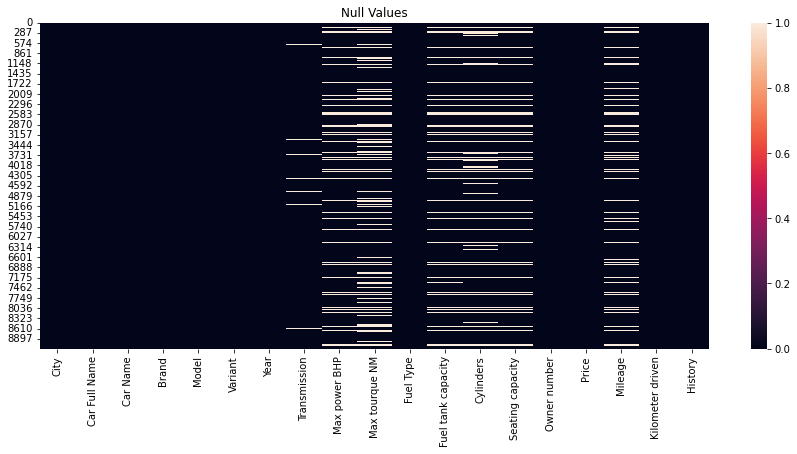

In [8]:
#heatmap of null values

plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [9]:
#checking the unique value counts of each feature

df.nunique()

City                    11
Car Full Name         1618
Car Name               131
Brand                   19
Model                  136
Variant                742
Year                    15
Transmission             2
Max power BHP          158
Max tourque NM         101
Fuel Type                6
Fuel tank capacity      29
Cylinders               16
Seating capacity         8
Owner number             4
Price                 3501
Mileage                256
Kilometer driven      4464
History                  1
dtype: int64

* We have some unique values present in few columns and some columns are having more repetitive values.
* We do not have any columns with all unique values
* We have only 1 unique value for History, So we can remove it.

In [10]:
df = df.drop(["History"],axis=1)

## 2. Data Cleaning

In [11]:
#lets check the data type of ech column

df.dtypes

City                  object
Car Full Name         object
Car Name              object
Brand                 object
Model                 object
Variant               object
Year                   int64
Transmission          object
Max power BHP         object
Max tourque NM        object
Fuel Type             object
Fuel tank capacity    object
Cylinders             object
Seating capacity      object
Owner number           int64
Price                  int64
Mileage               object
Kilometer driven       int64
dtype: object

#### We can see that many columns even though it should be int or float type, It shows Object datatype. so lets check value counts for each column.

# City

In [12]:
#lets check unique values for object datatype columns

df['City'].value_counts().sort_index()

Ahmedabad     402
Bengaluru     395
Chennai       537
Gurgaon       612
Hyderabad     267
Kanpur       4560
Kolkata       181
Mumbai        570
New Delhi     621
Noida         617
Pune          414
Name: City, dtype: int64

* I have scraped from 11 cities in India.
* We have almost half of the data from the City- Kanpur.
* We might have same car details posted in different cities.
* There are no missing values in City

# Car Full Name

In [13]:
#lets check unique values for object datatype columns

pd. set_option('display.max_rows', 1700)#to display more columns
df['Car Full Name'].value_counts().sort_index()

2008 HYUNDAI I10 SPORTZ 1.2 MANUAL                                     1
2008 MARUTI WAGON R DUO LXI LPG MANUAL                                 2
2008 MARUTI WAGON R LXI MANUAL                                         1
2009 HYUNDAI ACCENT EXECUTIVE MANUAL                                   2
2009 HYUNDAI I10 ERA 1.1 IRDE MANUAL                                  12
2009 HYUNDAI I10 MAGNA 1.2 MANUAL                                      8
2009 HYUNDAI I10 SPORTZ 1.2 MANUAL                                     3
2009 MARUTI SWIFT DZIRE VXI 1.3 MANUAL                                 4
2009 MARUTI WAGON R LXI MANUAL                                         2
2009 MARUTI ZEN ESTILO VXI MANUAL                                      4
2009 TOYOTA COROLLA ALTIS  VL AT AUTOMATIC                             2
2009 TOYOTA FORTUNER 3.0 MT 4X4 MANUAL                                 2
2009 TOYOTA INNOVA 2.5 V 8 STR MANUAL                                  2
2010 HONDA CITY S MT PETROL MANUAL                 

* Above are the vehicles Full name which contain Year, Brand, Model and variant.
* There are no Missing values in the Car Full Name column.
* **I will be removing this column as I have extracted necessary details from this column.**

In [14]:
df = df.drop(["Car Full Name"],axis=1)

# Car Name

In [15]:
#lets check unique values for object datatype columns

df['Car Name'].value_counts().sort_index()

Audi A3                     14
Audi A4                      4
Audi A6                      8
Audi Q3                     29
Audi Q5                      4
BMW 3 Series                 4
BMW 5 Series                 4
BMW X1                       4
BMW X3                       8
Datsun Go                    5
Datsun Go Plus               4
Datsun Redi Go              32
Ford Ecosport              342
Ford Endeavour               6
Ford FREESTYLE              22
Ford Figo                    2
Ford Figo Aspire            29
Ford New Figo               10
Honda Accord                 1
Honda Amaze                126
Honda BR-V                   4
Honda Brio                  48
Honda CRV                    4
Honda City                 239
Honda Civic                 18
Honda Jazz                 135
Honda WR-V                  80
Hyundai AURA                15
Hyundai Accent               2
Hyundai Creta              252
Hyundai Elite i20          366
Hyundai Eon                150
Hyundai 

* Above are the CarNames in my dataset.
* We have different cars in this column and there are no duplicates.
* We dont have missing values or empty spaces here.

# Brand

In [16]:
#lets check unique values for object datatype columns

df['Brand'].value_counts().sort_index()

AUDI               59
BMW                20
DATSUN             41
FORD              411
HONDA             655
HYUNDAI          2122
JAGUAR              6
Jeep               93
KIA               105
MAHINDRA          173
MARUTI           4271
MERCEDES BENZ      27
MG                135
NISSAN             48
RENAULT           357
SKODA              51
TATA              229
TOYOTA            227
VOLKSWAGEN        146
Name: Brand, dtype: int64

* I have 19 different brands of cars in my dataset.
* Almost all major cartypes are in my dataset like Maruti, Mahindra, Renault,Toyota, Hyundai etc.
* I dont have any missing values, Nan or emplty spaces in my dataset.

# Model

In [17]:
#lets check unique values for object datatype columns

df['Model'].value_counts().sort_index()

3 SERIES              4
5 SERIES              4
A STAR                2
A3                   14
A4                    4
A6                    8
ACCENT                2
ACCORD                1
ALTO                232
ALTO 800            417
ALTO K10            267
ALTROZ               27
ALTROZ                5
AMAZE               126
AMEO                 37
AURA                 15
B CLASS               2
BALENO              620
BOLERO                1
BR-V                  4
BRIO                 48
C CLASS               9
CAPTUR                8
CELERIO             179
CELERIO X            14
CIAZ                127
CITY                239
CIVIC                18
CLA CLASS             2
COROLLA ALTIS        56
CRETA               252
CRV                   4
Compass              93
DUSTER               51
DZIRE               221
E CLASS              12
ECOSPORT            342
EECO                152
ELITE I20           366
ENDEAVOUR             6
EON                 150
ERTIGA          

* We have 136 different Models in my dataset.
* No missing values, Nan or empty spaces in my dataset.

# Variant

In [18]:
#lets check unique values for object datatype columns

df['Variant'].value_counts().sort_index()

\t250 CDI ELEGANCE AT                        2
\tALPHA 1.5 MT VTVT SHVS                     1
\tD LITE PLUS(O)                             1
\tXZA 1.2 REVOTRON                           1
\tZETA AT 1.5 SHVS                           2
\tZeta 1.2 K12 SHVS                          2
 GL                                          4
 VL AT                                      10
 ZDI SHVS                                    2
1.0 AMBITION TSI AT                         10
1.0 AMBITION TSI MT                          1
1.0 CLIMBER OPT                              8
1.0 CLIMBER OPT AMT                          4
1.0 ECOBOOST TITANIUM SPORTS(SUNROOF)        4
1.0 LXI (O)                                  4
1.0 RXL AT                                   4
1.0 RXL PETROL                               7
1.0 RXT                                     16
1.0 RXT Opt                                 34
1.0 RXT Opt AT                              15
1.0 RXZ                                     16
1.0 RXZ      

* I have 742 different Variants of cars. Lets groupby brands for better understanding.

In [19]:
df.groupby("Brand")["Variant"].value_counts()

Brand          Variant                                
AUDI           35TDI PREMIUM                               14
               2.0 TDI MT S EDITION                         8
               35 TDI Quattro                               8
               2.0 TDI  PREMIUM                             4
               2.0 TDI QUATTRO                              4
               2.0 TDI S LINE                               4
               2.0 TDI TECHNOLOGY                           4
               30 TDI MT S EDITION                          4
               30 TDI PREMIUM PLUS                          4
               35 TDI S LINE                                4
               30TFSI Premium Plus                          1
BMW            XDRIVE 20D                                   8
               520D LUXURY LINE                             4
               SDRIVE 20D                                   4
               320D                                         2
               

* Above code shows that in my dataset, I have different variants of each brand.
* Highest number of Variants are present in Maruti and Hyundai.

# Year

In [20]:
#lets check unique values for object datatype columns

df['Year'].value_counts().sort_index()

2008       4
2009      41
2010      41
2011      77
2012     108
2013     381
2014     638
2015     731
2016    1014
2017    1581
2018    1592
2019    1427
2020     898
2021     619
2022      24
Name: Year, dtype: int64

* We have Car manufactured Year from 2008 to 2022.
* No missing data or empty spaces in this column.

# Transmission

In [21]:
#lets check unique values for object datatype columns

df['Transmission'].value_counts().sort_index()

AUTOMATIC    1445
MANUAL       7579
Name: Transmission, dtype: int64

* We have 152 missing values in Transmission.
* Since its a categorical column, Since more number of vehicles are Manual, We can use Mode imputation technique to fill missing values.

In [22]:
#replacing missing values of Transmission with Mode

df["Transmission"] = df["Transmission"].fillna(df["Transmission"].mode()[0])

# Max Power BHP

In [23]:
#lets check unique values for object datatype columns

df['Max power BHP'].value_counts().sort_index()

100                   23
101                    9
102                    4
102.57                 2
103                   45
103.2                 18
103.25                 5
103.26                 1
103.5                  8
103.6                  6
104                    4
105                   25
105.94                 4
106                   46
108                   33
108.45                 2
108.5                 10
108.6                  2
108.62                 3
109                   58
110                   41
110.4                 14
113                   19
113.18                 2
113.4                  2
113.42                24
113.43                 2
113.45                 2
114                   16
115                   12
116                   21
117                  127
117.3                  2
117.6                 11
118                   54
118.3                  2
119                   12
120                   23
121                  141
121.3                 23


* Max power BHP is supposed to be Float type but its showing Object type. It means we have some string chars in the column.
* I have 1131 mising values for Max power BHP.

In [24]:
#lets check for empty observations

df.loc[df['Max power BHP'] == " "]

,City,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max tourque NM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Price,Mileage,Kilometer driven


There are no empty observations

In [25]:
df['Max power BHP'] = df['Max power BHP'].str.replace('73 bhp @ 6000 rpm','73')
df['Max power BHP']= df['Max power BHP'].astype('float')

* We have changed the datatype to float. Lets use the imputation technique. 
* I will check the skewness first inorder to determine imputation by mean or median.

In [26]:
df["Max power BHP"].skew()

1.4179329680147004

We have skewness present in Max power BHP. So I will use Imputation by median

In [27]:
for col in ["Max power BHP"]:
    df[col] = df[col].fillna(df[col].median())

We have changed the datatype and removed Nan values.

# Max tourque NM

In [28]:
#lets check unique values for object datatype columns

df['Max tourque NM'].value_counts().sort_index()

104           33
109           93
110          200
111           12
112           24
112.7619      34
113          342
113.7          3
113.75         5
113.76        30
113.796       22
114          657
115          957
119            3
120            9
125            4
130           62
132           10
135            5
136            2
136.159        3
138           16
140          101
142           11
143.8          7
144           22
145          150
146           35
149            1
150           60
151          117
153           12
154           61
158            8
160            6
170           29
171.62         2
172            4
173           38
174           22
175           29
190          281
192            6
200          365
2000          65
204           61
205          152
215            9
219.7          3
219.744       11
220          108
222            1
224           24
226            4
230            9
240           10
242            7
245            2
247           

In [29]:
#lets check empty observations:

df.loc[df['Max tourque NM'] == " "]

,City,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max tourque NM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Price,Mileage,Kilometer driven


We dont have any empty observations. But still its in Object datatype. Lets change the datatype to float.

In [30]:
df['Max tourque NM'] = df['Max tourque NM'].str.replace('99.04   4','99.04')
df['Max tourque NM']= df['Max tourque NM'].astype('float')

In [31]:
#lets check skewness to treat missing values

df["Max tourque NM"].skew()

5.9536750875760855

In [32]:
#Since skewness is present, we will use median

for col in ["Max tourque NM"]:
    df[col] = df[col].fillna(df[col].median())

Missing values have been removed and datatype changed

# Fuel Type

In [33]:
#lets check unique values for object datatype columns

df['Fuel Type'].value_counts().sort_index()

CNG                             32
Diesel                        2201
Hybrid (Electric + Petrol)       6
LPG                              9
Petrol                        6888
Petrol + CNG                    40
Name: Fuel Type, dtype: int64

* We have 6 different fuel types and no missing values in this column.

# Fuel tank capacity

In [34]:
#lets check unique values for object datatype columns

df['Fuel tank capacity'].value_counts().sort_index()

15              3
27             71
28            263
32            198
35           1854
37            978
40            701
40 litres       1
41             29
42            487
43            900
44             38
45            725
47             32
48            345
50            226
51              4
52            334
55            223
58              4
60            445
62             16
64             24
65             13
66             11
67              8
70             46
75              8
80             37
Name: Fuel tank capacity, dtype: int64

In [35]:
#lets change 40 liters to float value and change the datatype

df['Fuel tank capacity'] = df['Fuel tank capacity'].str.replace('40 litres','40')
df['Fuel tank capacity']= df['Fuel tank capacity'].astype('float')

* We have 28 different fuel tank capacity starting from 15 to 80.
* Missing values have to imputed with mean or median according to skewness.

In [36]:
#lets check skewness to treat missing values

df["Fuel tank capacity"].skew()

1.1387567808877441

In [37]:
#Since skewness is present, we will use median

for col in ["Fuel tank capacity"]:
    df[col] = df[col].fillna(df[col].median())

Missing values removed and datatype changed

# Cylinders

In [38]:
#lets check unique values for object datatype columns

df['Cylinders'].value_counts().sort_index()

 3 , Inline                608
 4 , Inline               2930
2 Cylinders In V Shape       3
2, Inline                    2
3                          173
3  Inline                   17
3 , Inline                 201
3 inline                    10
3, Inline                 1221
4                          594
4  Inline                   21
4 , Inline                   2
4 , Inline                 378
4 Cylinders Inline           1
4 cylinders Inline         176
4, Inline                 1408
Name: Cylinders, dtype: int64

We can see duplicates in this column. Lets change it

In [39]:
df['Cylinders'] = df['Cylinders'].str.replace(' 3 , Inline','3')
df['Cylinders'] = df['Cylinders'].str.replace('3  Inline','3')
df['Cylinders'] = df['Cylinders'].str.replace('3 , Inline','3')
df['Cylinders'] = df['Cylinders'].str.replace('3, Inline','3')
df['Cylinders'] = df['Cylinders'].str.replace('3, Inline','3')
df['Cylinders'] = df['Cylinders'].str.replace(' 4 , Inline','4')
df['Cylinders'] = df['Cylinders'].str.replace('4  Inline','4')
df['Cylinders'] = df['Cylinders'].str.replace('4 , Inline','4')
df['Cylinders'] = df['Cylinders'].str.replace('4 , Inline','4')
df['Cylinders'] = df['Cylinders'].str.replace('4 , Inline ','4')
df['Cylinders'] = df['Cylinders'].str.replace('4 Cylinders Inline','4')
df['Cylinders'] = df['Cylinders'].str.replace('4 cylinders Inline','4')
df['Cylinders'] = df['Cylinders'].str.replace('4, Inline','4')
df['Cylinders'] = df['Cylinders'].str.replace('2 Cylinders In V Shape','2V')
df['Cylinders'] = df['Cylinders'].str.replace('2, Inline','2')

In [40]:
df['Cylinders'] = df['Cylinders'].str.replace('3 inline','3')
df['Cylinders'] = df['Cylinders'].str.replace('3 ','3')
df['Cylinders'] = df['Cylinders'].str.replace('4 ','4')
df['Cylinders'].value_counts().sort_index()

2        2
2V       3
3     2230
4     5510
Name: Cylinders, dtype: int64

Since its categorical type, we can use imputation by mode technique to remove missing values

In [41]:
for col in ["Cylinders"]:
    df[col] = df[col].fillna(df[col].mode()[0])

Missing values treated

# Seating capacity

In [42]:
#lets check unique values for object datatype columns

df['Seating capacity'].value_counts().sort_index()

4              8
5           7750
5 Person       1
5Person       12
6             34
7            217
7Person        3
8             20
Name: Seating capacity, dtype: int64

In [43]:
#lets change the duplicates
df['Seating capacity'] = df['Seating capacity'].str.replace('5 Person','5')
df['Seating capacity'] = df['Seating capacity'].str.replace('5Person','5')
df['Seating capacity'] = df['Seating capacity'].str.replace('7Person','7')
df['Seating capacity'].value_counts().sort_index()

4       8
5    7763
6      34
7     220
8      20
Name: Seating capacity, dtype: int64

Since its categorical type, we can use imputation by mode technique to remove missing values

In [44]:
for col in ["Seating capacity"]:
    df[col] = df[col].fillna(df[col].mode()[0])

Missing values have been treated

# Owner Number

In [45]:
#lets check unique values for object datatype columns

df['Owner number'].value_counts().sort_index()

1    7197
2    1803
3     174
4       2
Name: Owner number, dtype: int64

* We have from 1st owner to 4 owners in my dataset.
* No missing values for Owner numbers in my dataset.
* datatype is Int. We are good to go

# Price

In [46]:
#lets check unique values for object datatype columns

df['Price'].value_counts().sort_index()

143799     1
173099     1
177299     4
183799     1
189599     1
          ..
2109599    1
2144199    2
2148299    2
2216399    2
3287199    2
Name: Price, Length: 3501, dtype: int64

* We have 3501 different prices in my dataset.
* The least price is 1,43,799 and Highest price is 32,87,199.
* There are no missing values in my Target "Price".
* Datatype is Integer, so we are good to go.

# Mileage

In [47]:
#lets check unique values for object datatype columns

df['Mileage'].value_counts().sort_index()

-                6
10               8
10.75            2
11               4
11.2             2
11.5             2
11.6            14
11.74            2
11.9            12
12               4
12.2             2
12.37            4
12.4             8
12.55           11
12.8            13
12.88            1
12.9             4
12.95            2
12.99           20
13              15
13.24            4
13.28           12
13.5             4
13.53            2
13.6             8
13.7             2
13.8             2
13.87            2
13.9             6
13.96           72
14              28
14.02            2
14.1            11
14.19            4
14.2             4
14.23            3
14.28            4
14.29            2
14.3             2
14.4             6
14.54            1
14.59            6
14.62            2
14.67            2
14.7             2
14.74            4
14.8            24
14.84          119
14.9            12
15               5
15.04            3
15.1            30
15.23       

In [48]:
#replacing missing value and string character to Nan and float 

df['Mileage'].replace('-',np.nan, inplace = True)
df['Mileage'] = df['Mileage'].str.replace('16.2 kmpl','16.2')
df['Mileage'] = df['Mileage'].str.replace('23.59000015','23.59')
df['Mileage'] = df['Mileage'].str.replace('20.37999916','20.37')
df['Mileage'] = df['Mileage'].str.replace('18.14999962','18.14')
df['Mileage'] = df['Mileage'].str.replace('18.143','18.14')

In [49]:
#Changing the datatype to float

df['Mileage']= df['Mileage'].astype('float')

In [50]:
#finding the skewness to treat missing values with mean or median

df["Mileage"].skew()

-0.19093186150791763

In [51]:
#no skewness present. Lets use mean imputation technique

for col in ["Mileage"]:
    df[col] = df[col].fillna(df[col].mean())

Datatype changed and Missing values are treated.

# Kilometer Driven

In [52]:
#lets check unique values for object datatype columns

df['Kilometer driven'].value_counts().sort_index()

1         2
71        2
94        2
258       1
264       1
         ..
235314    2
242524    1
281380    2
353688    2
400055    4
Name: Kilometer driven, Length: 4464, dtype: int64

* I have Cars with 1 km driven to 4,00,055 kms driven in my dataset.
* There are no Missing values.
* Datatype is in Integet and so we are good to go.

#### Now, Lets check the Info of my dataset again to find out if I missed any.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176 entries, 0 to 9175
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                9176 non-null   object 
 1   Car Name            9176 non-null   object 
 2   Brand               9176 non-null   object 
 3   Model               9176 non-null   object 
 4   Variant             9176 non-null   object 
 5   Year                9176 non-null   int64  
 6   Transmission        9176 non-null   object 
 7   Max power BHP       9176 non-null   float64
 8   Max tourque NM      9176 non-null   float64
 9   Fuel Type           9176 non-null   object 
 10  Fuel tank capacity  9176 non-null   float64
 11  Cylinders           9176 non-null   object 
 12  Seating capacity    9176 non-null   object 
 13  Owner number        9176 non-null   int64  
 14  Price               9176 non-null   int64  
 15  Mileage             9176 non-null   float64
 16  Kilome

* My dataset is pretty good now.
* No missing values.
* 9 Object datatypes are 
    * City
    * Car Name
    * Brand
    * Model
    * Variant
    * Transmission
    * Fuel Type
    * Cylinders and 
    * Seating Capacity

* We have 4 float type columns:- 
    * Max power BHP
    * Max torque NM
    * Fuel Tank Capacity
    * Mileage

* I have 4 Int type columns:
    * Year
    * Owner number
    * Price
    * Kilometer driven

Lets begin with the Data Visualization

In [54]:
#Checking for any null values again

df.isnull().sum()

City                  0
Car Name              0
Brand                 0
Model                 0
Variant               0
Year                  0
Transmission          0
Max power BHP         0
Max tourque NM        0
Fuel Type             0
Fuel tank capacity    0
Cylinders             0
Seating capacity      0
Owner number          0
Price                 0
Mileage               0
Kilometer driven      0
dtype: int64

No Null values

In [55]:
#my new dataset after Data Cleaning

df

,City,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max tourque NM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Price,Mileage,Kilometer driven
0,Gurgaon,Maruti Wagon R 1.0,MARUTI,WAGON R 1.0,VXI,2014,MANUAL,82.0,115.0,Petrol,40.0,4,5,2,281899,20.246299,86996
1,Gurgaon,Honda City,HONDA,CITY,S MT PETROL,2010,MANUAL,118.0,146.0,Petrol,42.0,4,5,1,413999,11.600000,39307
2,Gurgaon,MG HECTOR,MG,HECTOR,SHARP DCT PETROL,2019,AUTOMATIC,141.0,250.0,Petrol,60.0,4,5,1,1790199,13.960000,8717
3,Gurgaon,MG HECTOR,MG,HECTOR,SHARP 2.0 DIESEL,2019,MANUAL,169.0,350.0,Diesel,60.0,4,5,1,1557099,17.410000,49413
4,Gurgaon,Hyundai i20,HYUNDAI,I20,ERA 1.4 CRDI,2013,MANUAL,90.0,220.0,Diesel,45.0,4,5,1,306299,14.900000,29974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9171,Kanpur,Maruti Swift,MARUTI,SWIFT,VXI,2014,MANUAL,83.0,115.0,Petrol,42.0,4,5,1,334299,20.400000,171171
9172,Kanpur,Maruti Swift Dzire,MARUTI,SWIFT DZIRE,TOUR S DIESEL,2018,MANUAL,85.0,114.0,Diesel,42.0,4,5,1,440099,19.100000,98198
9173,Kanpur,Maruti Swift Dzire,MARUTI,SWIFT DZIRE,VDI BS IV,2012,MANUAL,75.0,190.0,Diesel,43.0,4,5,1,351599,14.000000,123014
9174,Kanpur,Hyundai Verna,HYUNDAI,VERNA,1.6 SX (O) AT CRDI,2020,AUTOMATIC,126.0,260.0,Diesel,45.0,4,5,1,1324699,21.020000,30448


In [56]:
#describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9176.0,2017.236378,2.370994,2008.0,2016.00,2017.000000,2019.00,2022.00
Max power BHP,9176.0,86.485524,25.383548,37.0,74.00,82.000000,89.00,271.00
Max tourque NM,9176.0,188.980147,392.382824,62.0,113.00,115.000000,145.00,4200.00
Fuel tank capacity,9176.0,41.748692,8.073103,15.0,35.00,40.000000,45.00,80.00
Owner number,9176.0,1.235070,0.468048,1.0,1.00,1.000000,1.00,4.00
Price,9176.0,649866.558631,337760.899979,143799.0,421499.00,556249.000000,766399.00,3287199.00
Mileage,9176.0,20.246299,2.935765,9.8,18.60,20.246299,22.05,31.79
Kilometer driven,9176.0,42718.976896,30265.122638,1.0,20757.75,37274.000000,59143.75,400055.00


* We have cars from 2008 to 2022.
* Max BHP Power from 37 to 271
* Max torque NM from 15 to 80.
* Fuel tank capacity from 15 to 80.
* Owners from 1 to 4.
* Price from 143799 to 2187199.
* Mileage from 9.8 to 31.79.
* Kms driven from 1 to 400055 kms.

Lets check the heat map of describe function

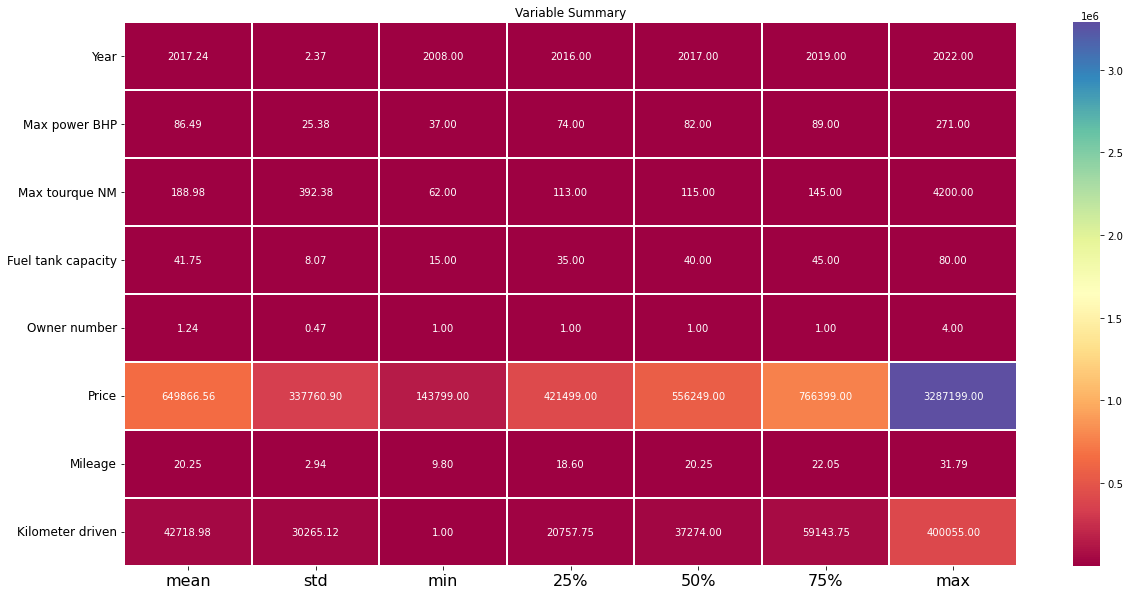

In [57]:
#Heatmap of the Descibe function

plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='Spectral')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

* Mean and Median of few columns are different. **We have skewness in the dataset.**
* Maximum value of few columns are way out of range. **We have Outliers in the dataset**.

## 3. Data Visualization

### a) Univariate Analysis

In [58]:
#Lets divide categorical columns and numerical columns

cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['City', 'Car Name', 'Brand', 'Model', 'Variant', 'Transmission', 'Fuel Type', 'Cylinders', 'Seating capacity']


In [59]:
# Now checking for numerical columns
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['Year', 'Max power BHP', 'Max tourque NM', 'Fuel tank capacity', 'Owner number', 'Price', 'Mileage', 'Kilometer driven']


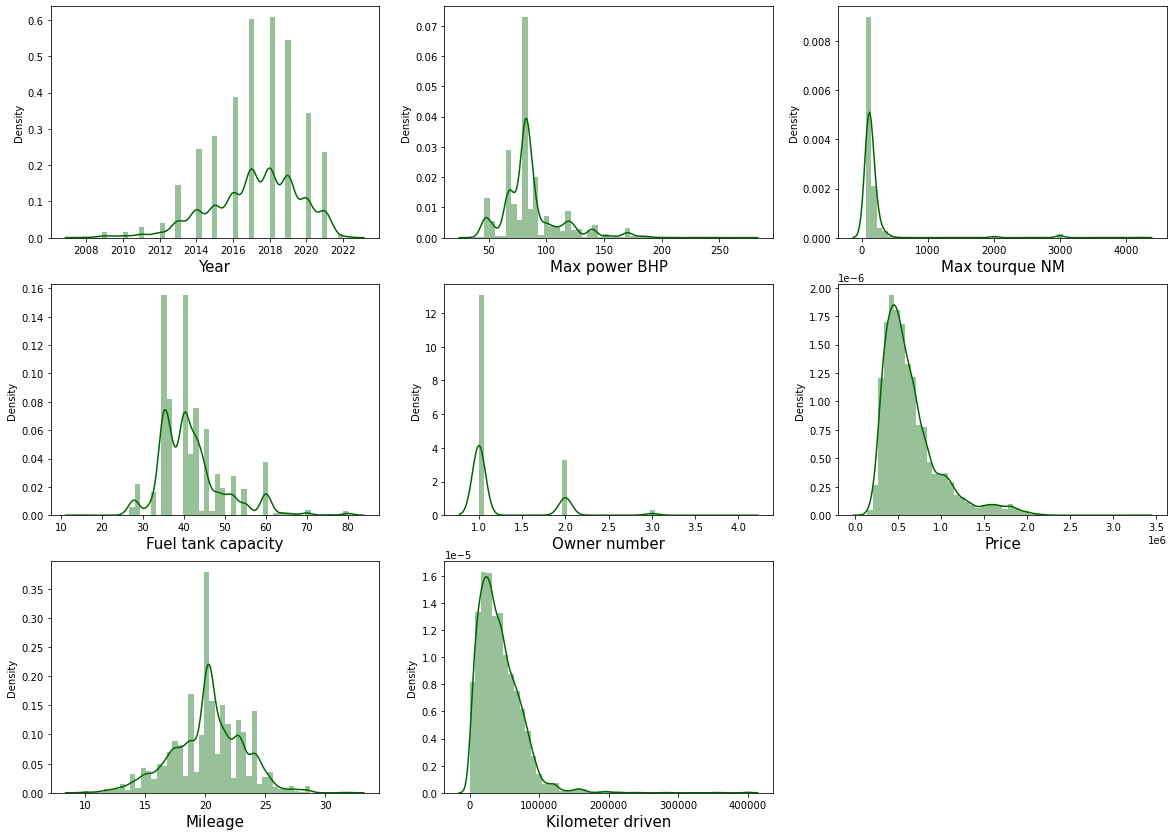

In [60]:
#Q1 What is the distribution of data for numerical columns?

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[i],color='darkgreen')
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

* Max power BHP, Max torque NM, Price, Kilometer driven, Owner numbers are right skewed.
* Year is left skewed.
* Fuel tank capacity and Mileage are somewhat normally distributed

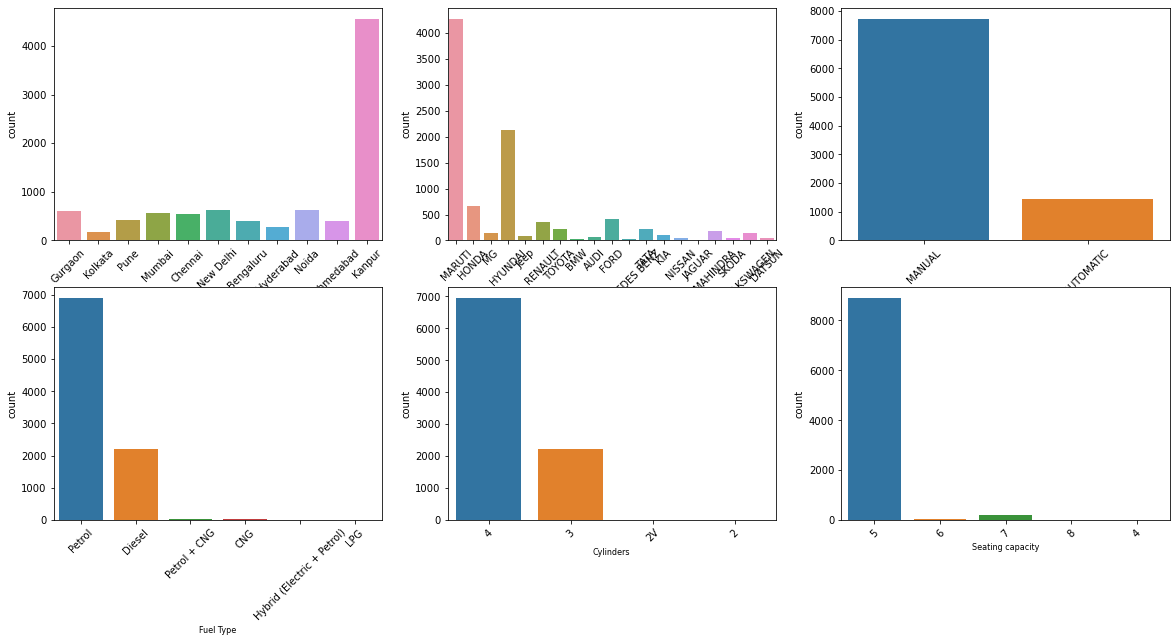

In [65]:
#Q2 What is the count of data for Categorical columns?

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
cat_col=["City","Brand","Transmission","Fuel Type","Cylinders","Seating capacity"]

for i in df[cat_col]:
    if plotnumber<=24 :
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=8)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

* Most of the data of used cars are from **City** Kanpur and least from Kolkata.
* Maruti is the most popular **Brand** in the dataset followed by hyundai. Least from Jaguar.
* Most of the cars are Manual **Transmission**.
* Most of the cars are Petrol as **fuel type** and i also have a very few number of Hybrid cars as well.
* Most of the cars are 4 **cylinders** and a very few 2 cylinders inline and V shape.
* Most cars have **seating Capacity** of 5 Seater.

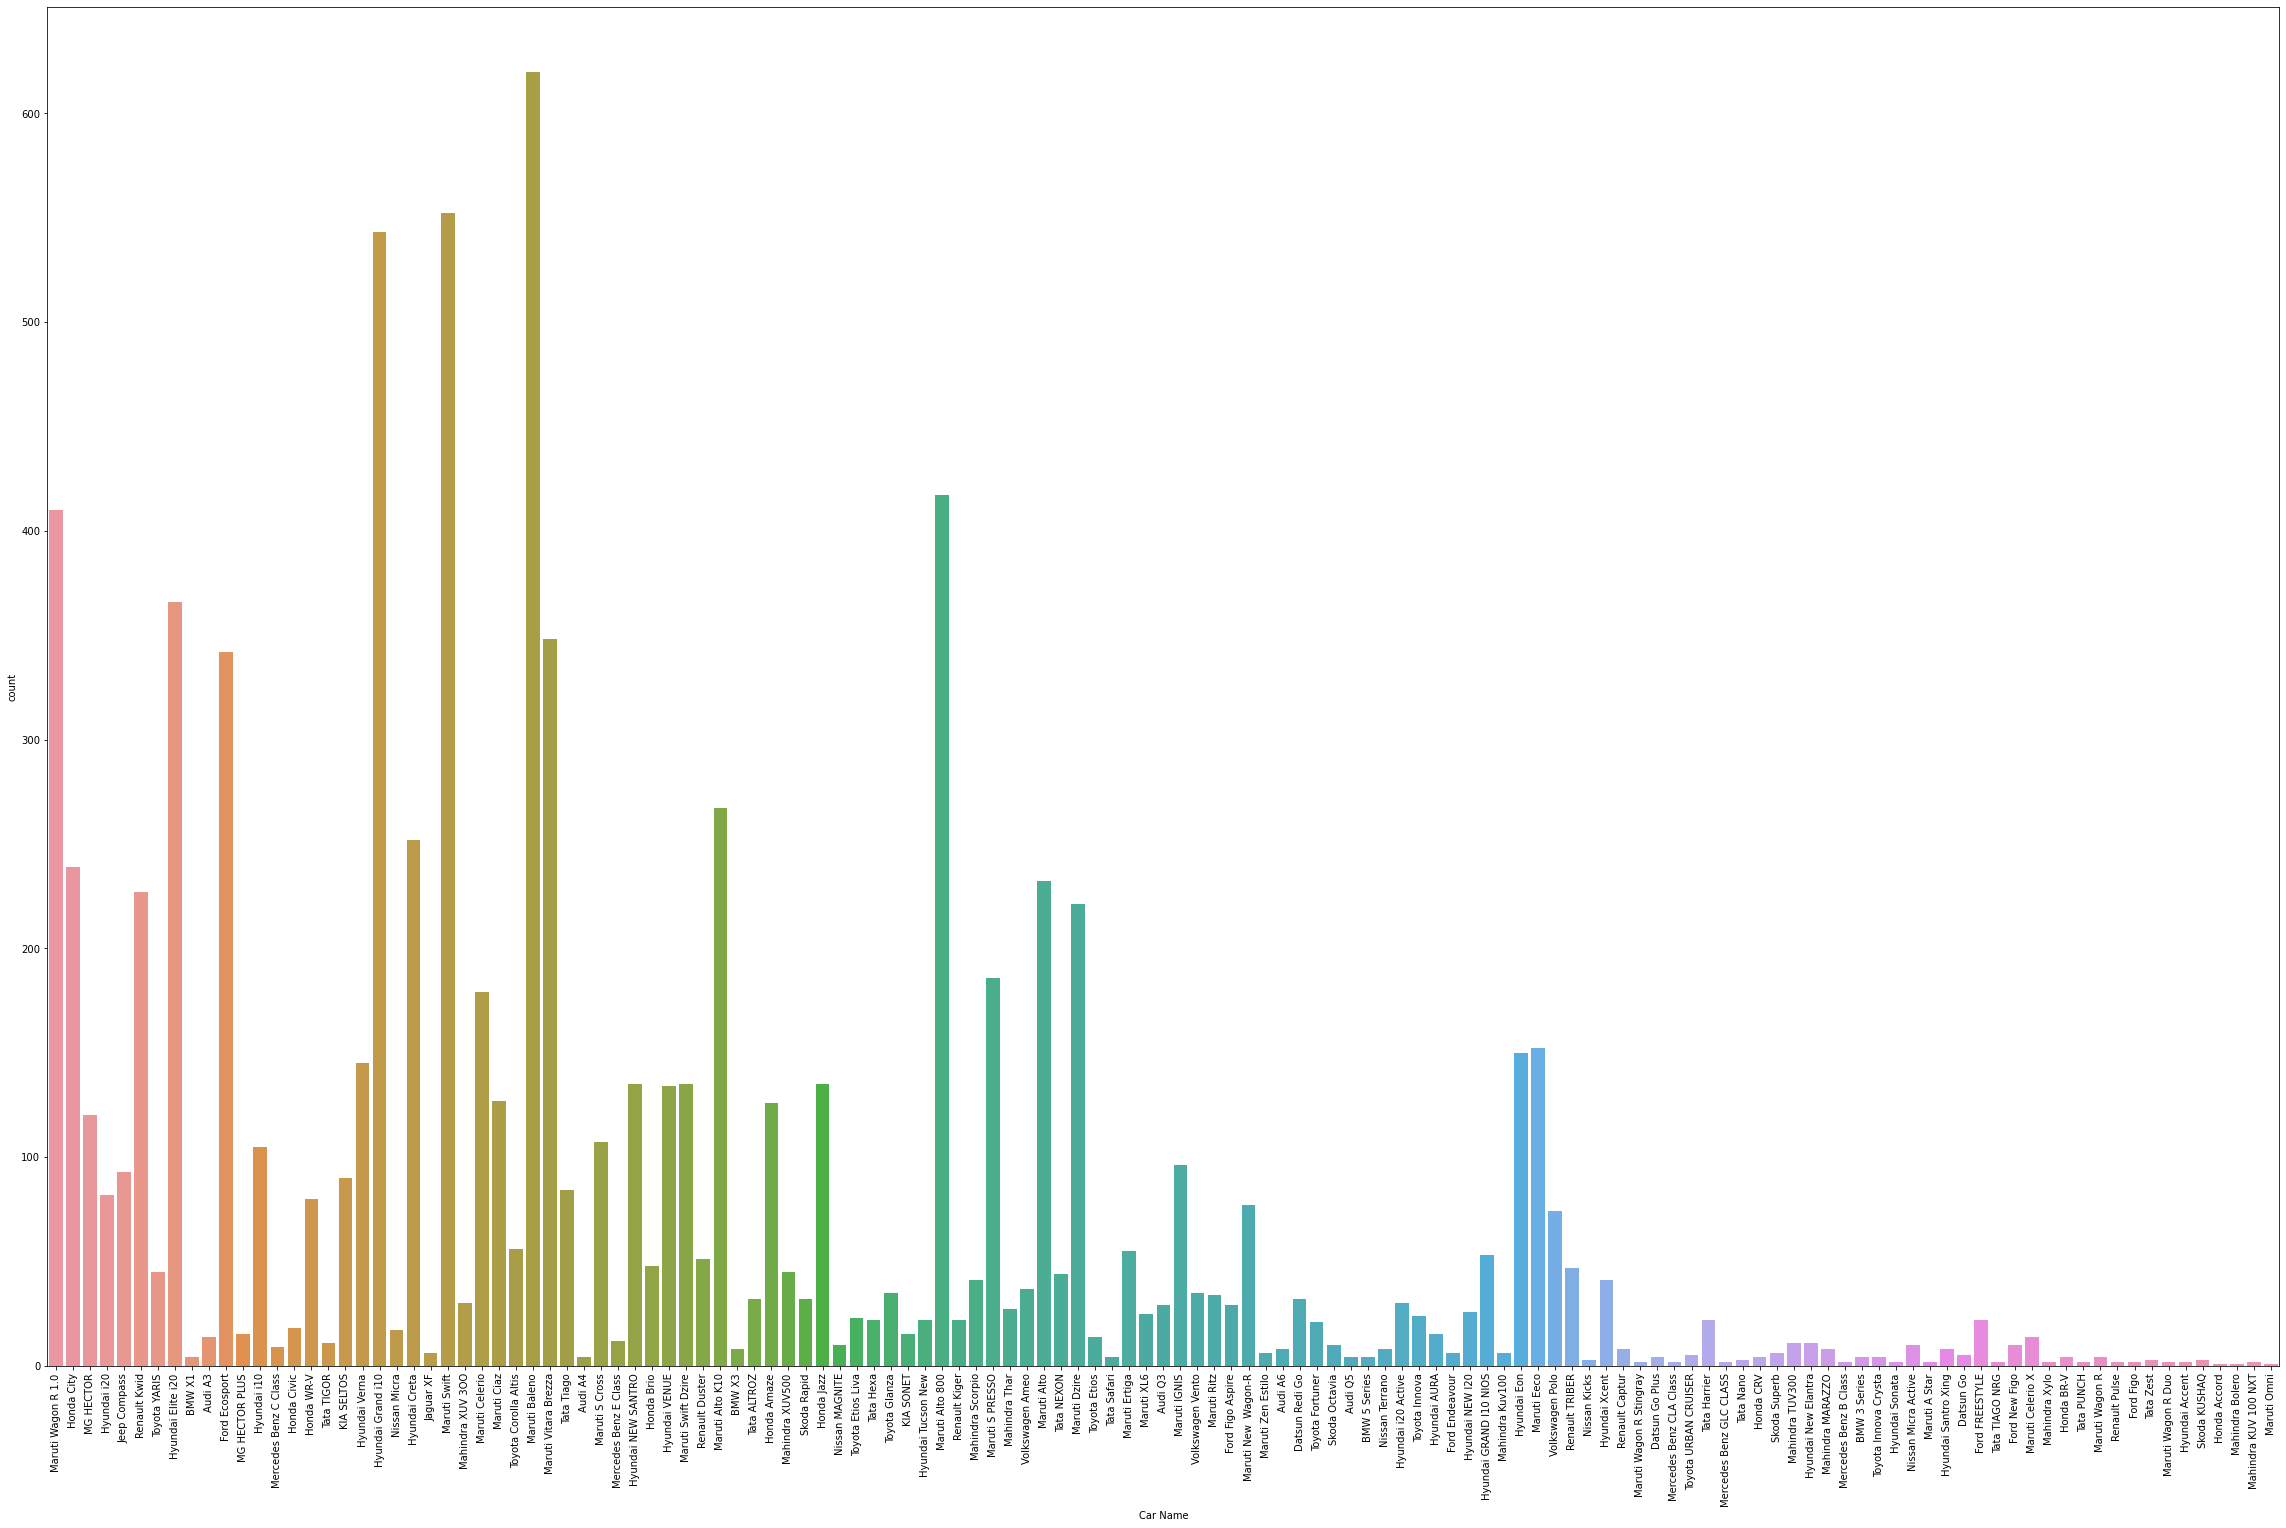

In [62]:
#Q3) What is the count of data for Car name column?
plt.figure(figsize=(40,25))
sns.countplot(df['Car Name'])
plt.xticks(rotation = 90)
plt.show()

* Maruti baleno is the most popular in my dataset followed by Maruti Swift and Hyundai grand i10.
* I have Maruti Alto800 and Maruti wagonR1.0 also on the top 5 list.
* We have only 1 data of Honda Accord, Maruti Omni and Mahindra Bolero.
* As mentioned earlier, Maruti is the top Brand followed by Hyundai in my dataset.

### b) Bivariate Analysis

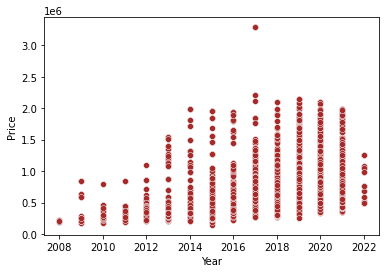

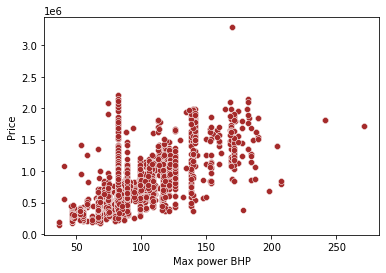

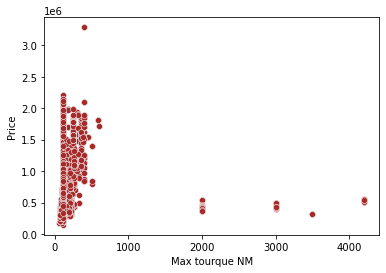

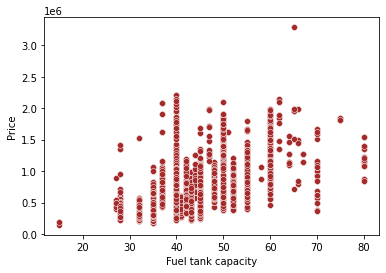

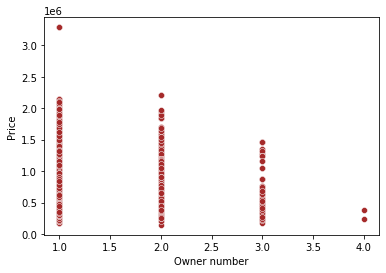

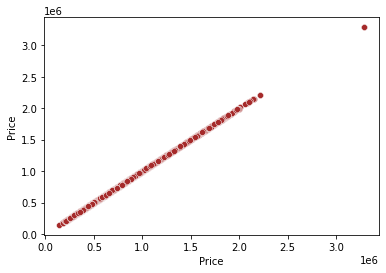

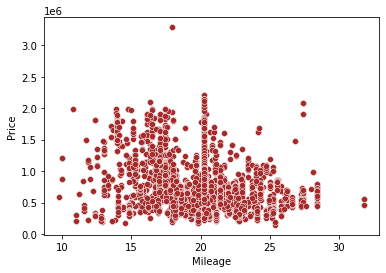

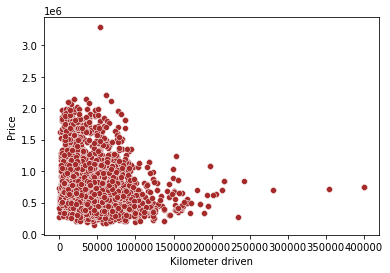

In [63]:
#Q4- What is the relation between numerical columns and the Target Variable?(scatterplot)

for i in df[num_cols]:
    plt.figure()
    sns.scatterplot(x=df[i],y=df.Price,color='brown')

* We can see some of the columns have direct relations and some do not have any relation with Target Price.
* **Year** - As year increases, Price also increases.
* **Max power BHP** - As max power BHP increases, Price also increases.
* **Max torque NM** - It shows least the torque, most of the price lies in there. no specific relation.
* **Fuel Tank capacity** - Most of the Price lies in between 35 to 60 litres capacity.
* **Owner Numbwer** - Price decreases as owner number increases.
* **Mileage** - Mileage and Price do not have specific relationship.
* **Kilometers driven** - Price is more when kilometers driven is less.

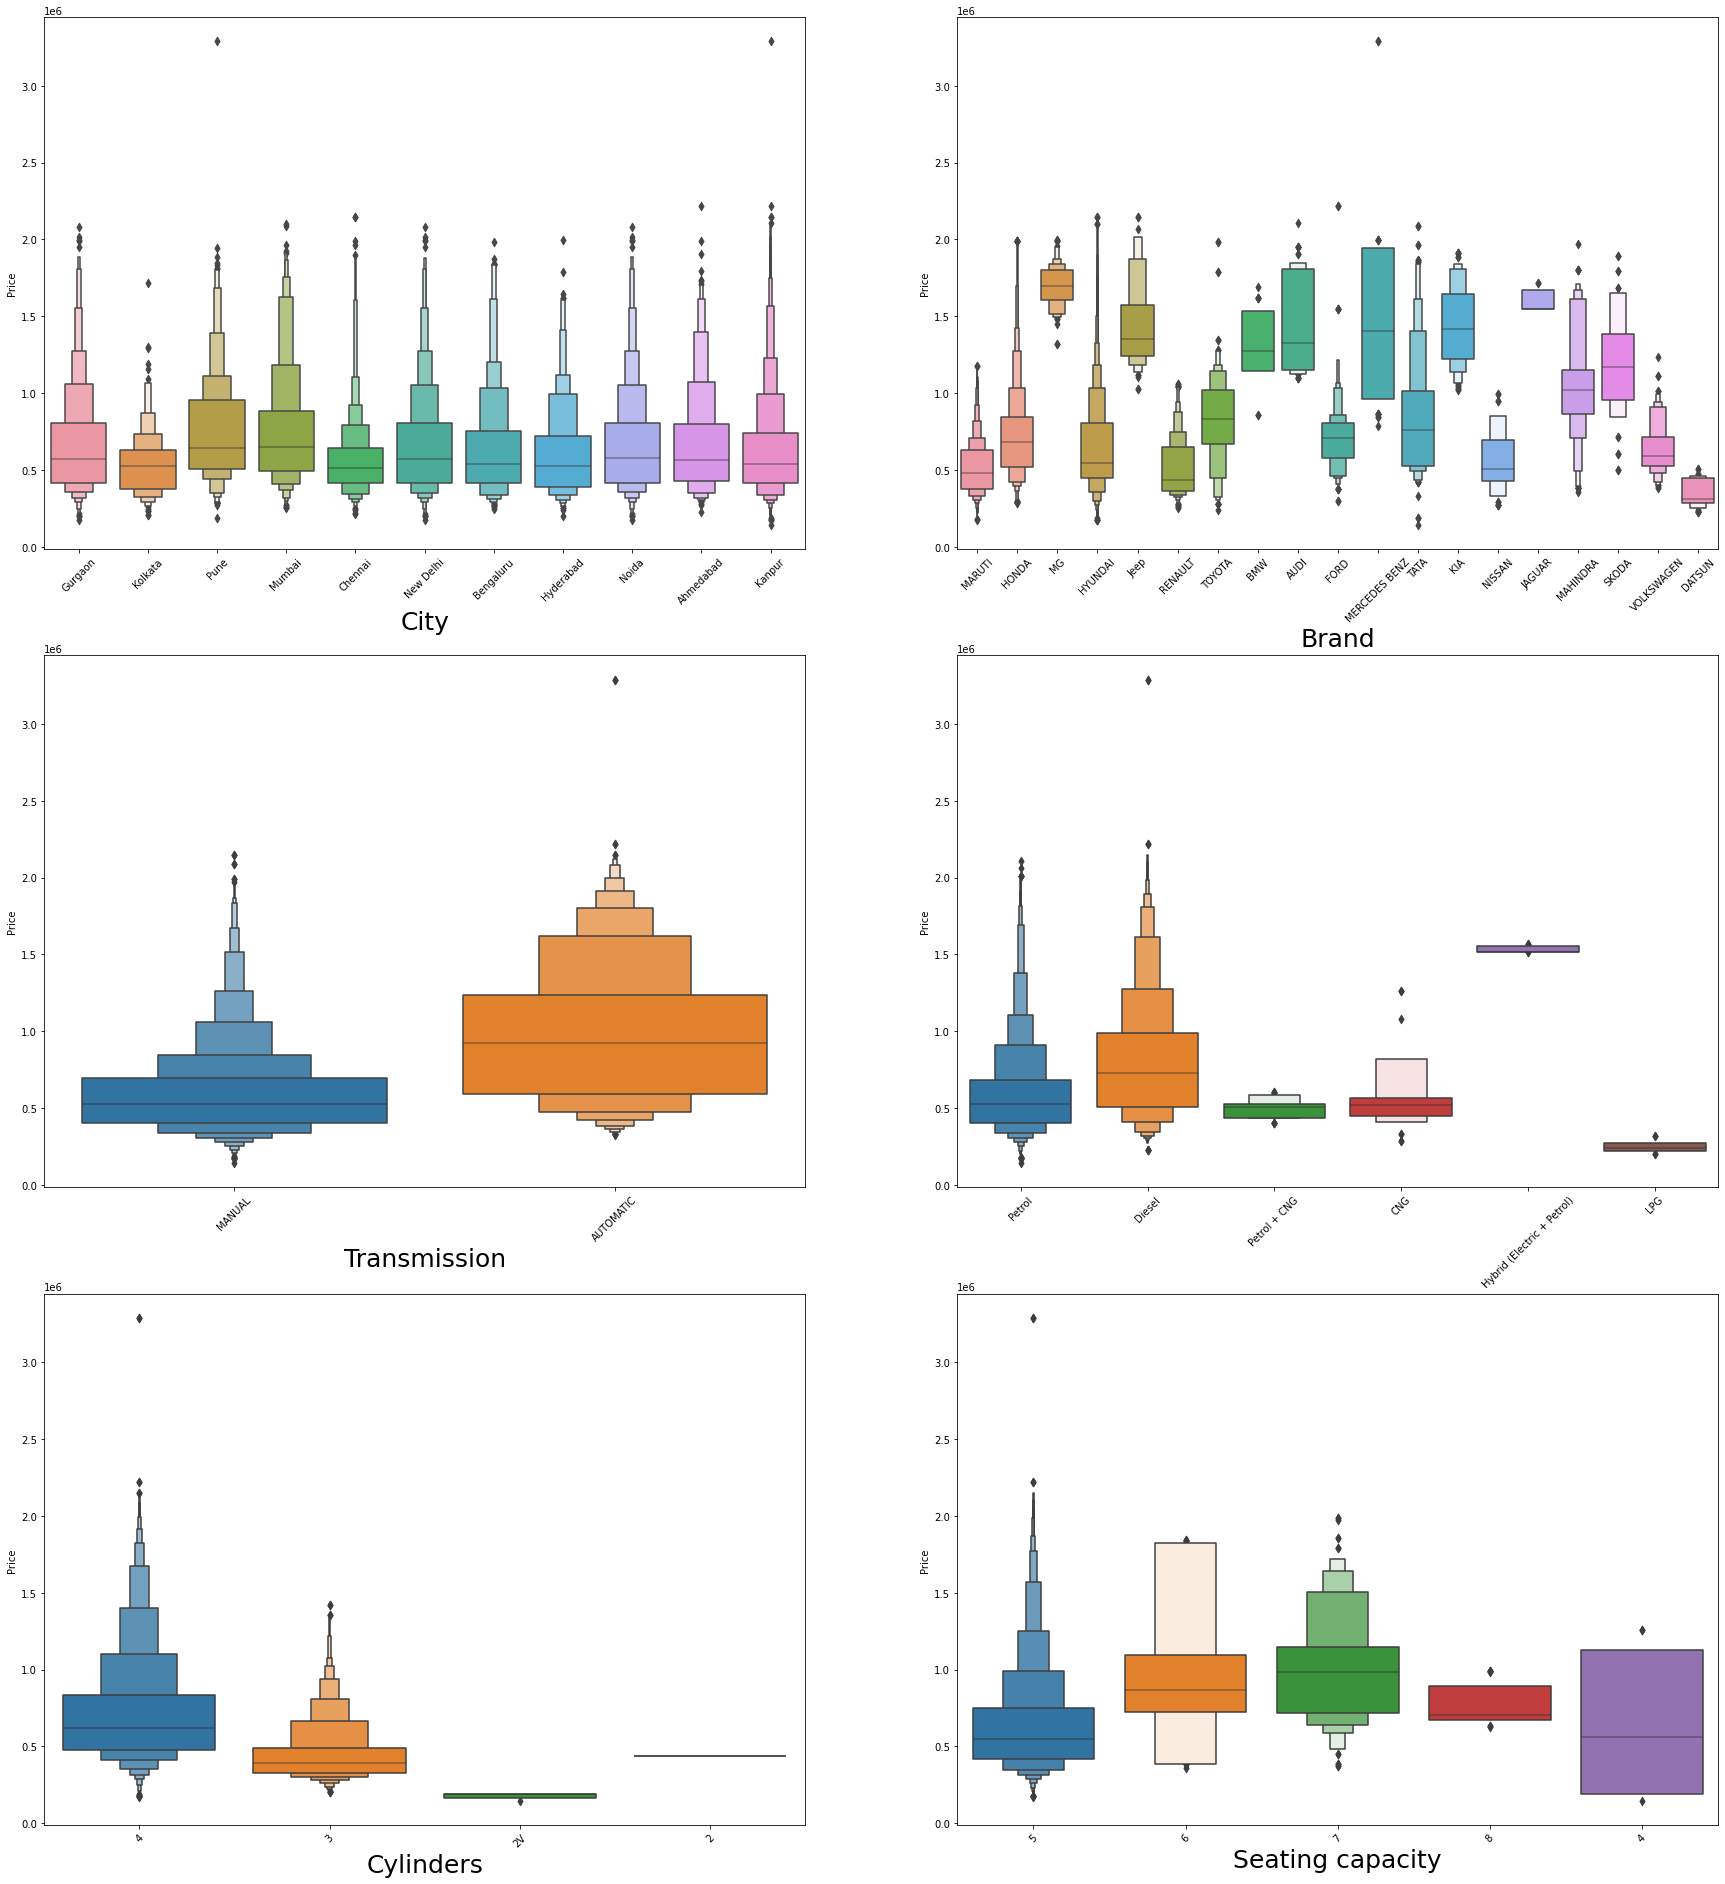

In [64]:
#Q5- What is the relationship between Categorical columns and Target variable?

plt.figure(figsize=(30,45), facecolor='white')
plotnumber = 1

for i in df[cat_col]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.boxenplot(x=df[i],y=df.Price)
        plt.xlabel(i,fontsize=25)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

* **City** - City do not have specific relation with Price.
* **Brand** - Mercedes is the most expensive Car in my dataset and Datsun Brand cars are mostly cheap.
* There are many outliers in the Brands column as the prices are sometimes very high for few of the models.
* **Transmission** - As we can see that Automatic cars are very expensive than Manual ones.
* **Fuel type** - Hybrid and Diesel cars are expensive than others.
* **Cylinders** - 4 cylinder cars are very expensive and 2 and 2V cylinders are cheap.
* **Seating capacity** - 6 and 7 seaters are most expensive than 5  and 4 seater.

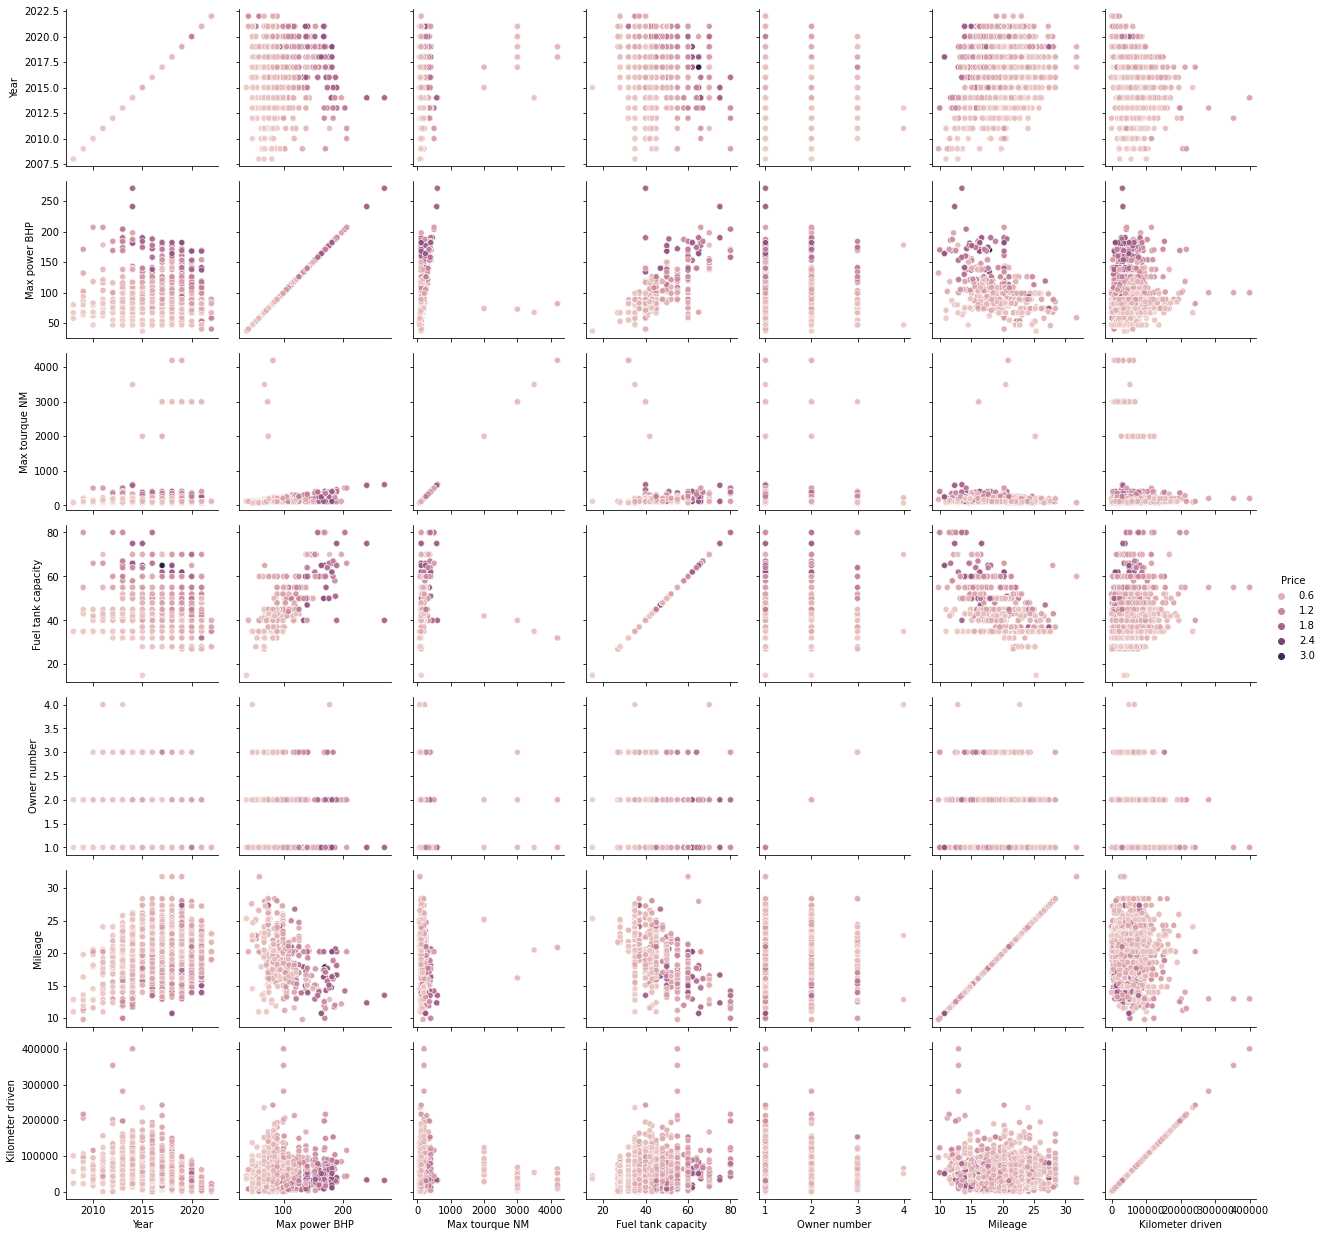

In [68]:
#Q6- Observe the Comparison between variables?

g = sns.PairGrid(df,hue="Price")
g = g.map(sns.scatterplot)
g.add_legend()

* There are a few Outliers in the dataset
* Some of the columns like Max power BHP, Year etc have positive relation with the Price.
* I can see that few of the independant variables are having linear relationship with other variables. Multicollinearity might be present.
* Most of the cars are in the range of 6,00,000

## 4- Feature Engineering

### a) Outlier Removal

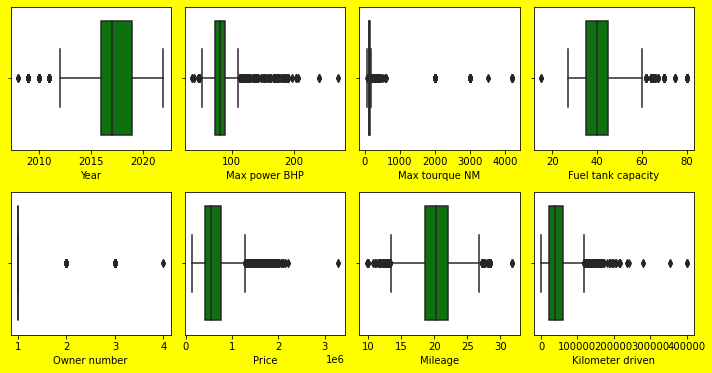

In [69]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(4,4,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


* As I have inferred earlier, There are many outliers in the data.
* As year, Owner number comes under categorical data, We will be not remove outliers from those.
* Price is the Target so we will not remove outliers from it as well.

In [72]:
#removing outliers using Zscore method

out_cols= df[['Max power BHP','Max tourque NM','Fuel tank capacity','Mileage','Kilometer driven']]

from scipy.stats import zscore

z=np.abs(zscore(out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

,City,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max tourque NM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Price,Mileage,Kilometer driven
0,Gurgaon,Maruti Wagon R 1.0,MARUTI,WAGON R 1.0,VXI,2014,MANUAL,82.0,115.0,Petrol,40.0,4,5,2,281899,20.246299,86996
1,Gurgaon,Honda City,HONDA,CITY,S MT PETROL,2010,MANUAL,118.0,146.0,Petrol,42.0,4,5,1,413999,11.600000,39307
2,Gurgaon,MG HECTOR,MG,HECTOR,SHARP DCT PETROL,2019,AUTOMATIC,141.0,250.0,Petrol,60.0,4,5,1,1790199,13.960000,8717
4,Gurgaon,Hyundai i20,HYUNDAI,I20,ERA 1.4 CRDI,2013,MANUAL,90.0,220.0,Diesel,45.0,4,5,1,306299,14.900000,29974
7,Gurgaon,Renault Kwid,RENAULT,KWID,RXL,2019,MANUAL,53.0,72.0,Petrol,28.0,3,5,2,353599,25.000000,35084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,Kanpur,Hyundai Elite i20,HYUNDAI,ELITE I20,SPORTZ 1.2,2018,MANUAL,82.0,115.0,Petrol,40.0,4,5,1,625299,19.800000,28548
9172,Kanpur,Maruti Swift Dzire,MARUTI,SWIFT DZIRE,TOUR S DIESEL,2018,MANUAL,85.0,114.0,Diesel,42.0,4,5,1,440099,19.100000,98198
9173,Kanpur,Maruti Swift Dzire,MARUTI,SWIFT DZIRE,VDI BS IV,2012,MANUAL,75.0,190.0,Diesel,43.0,4,5,1,351599,14.000000,123014
9174,Kanpur,Hyundai Verna,HYUNDAI,VERNA,1.6 SX (O) AT CRDI,2020,AUTOMATIC,126.0,260.0,Diesel,45.0,4,5,1,1324699,21.020000,30448


In [73]:
#lets check the shape of the dataset

print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (9176, 17)
new data shape: (8590, 17)


In [74]:
#checking the loss percentage

loss_percentage=(((9176-8590)/9176)*100)
loss_percentage

6.386224934612031

Since dataloss is 6.7% which is less than 10 we can proceed with this.

### b) Encoding

#### We have a few categorical data.

In [77]:
#Encoding the categorical columns:

cat_cols=['City',
 'Car Name',
 'Brand',
 'Model',
 'Variant',
 'Transmission',
 'Fuel Type',
 'Cylinders',
 'Seating capacity',
'Year','Owner number']

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df_new[i]=enc.fit_transform(df_new[i].values.reshape(-1,1))

In [79]:
#checking the new dataset

df_new

,City,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max tourque NM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Price,Mileage,Kilometer driven
0,3.0,70.0,8.0,106.0,544.0,6.0,1.0,82.0,115.0,4.0,40.0,2.0,1.0,1.0,281899,20.246299,86996
1,3.0,14.0,3.0,20.0,417.0,2.0,1.0,118.0,146.0,4.0,42.0,2.0,1.0,0.0,413999,11.600000,39307
2,3.0,39.0,10.0,43.0,432.0,11.0,0.0,141.0,250.0,4.0,60.0,2.0,1.0,0.0,1790199,13.960000,8717
4,3.0,34.0,4.0,49.0,258.0,5.0,1.0,90.0,220.0,1.0,45.0,2.0,1.0,0.0,306299,14.900000,29974
7,3.0,83.0,12.0,57.0,381.0,11.0,1.0,53.0,72.0,4.0,28.0,1.0,1.0,1.0,353599,25.000000,35084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,5.0,21.0,4.0,30.0,455.0,10.0,1.0,82.0,115.0,4.0,40.0,2.0,1.0,0.0,625299,19.800000,28548
9172,5.0,67.0,8.0,90.0,506.0,10.0,1.0,85.0,114.0,1.0,42.0,2.0,1.0,0.0,440099,19.100000,98198
9173,5.0,67.0,8.0,90.0,527.0,4.0,1.0,75.0,190.0,1.0,43.0,2.0,1.0,0.0,351599,14.000000,123014
9174,5.0,31.0,4.0,103.0,138.0,12.0,0.0,126.0,260.0,1.0,45.0,2.0,1.0,0.0,1324699,21.020000,30448


In [80]:
df_new.shape

(8590, 17)

We have 8590 rows and 17 columns in my dataset

### c) Correlation

In [81]:
#checking the correlation

df_new.corr()

,City,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max tourque NM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Price,Mileage,Kilometer driven
City,1.000000,0.020239,0.015921,0.041694,-0.025491,-0.055759,-0.040409,0.112453,0.136693,-0.131507,0.128730,0.097251,0.031768,-0.038333,0.060269,-0.033429,0.015093
Car Name,0.020239,1.000000,0.957718,0.335402,0.403478,0.061126,0.002687,-0.216164,-0.123674,-0.009796,-0.198905,-0.250451,0.090289,-0.048241,-0.120753,0.204322,-0.010490
Brand,0.015921,0.957718,1.000000,0.151252,0.324071,0.130798,-0.040225,-0.156134,-0.107417,0.041865,-0.144369,-0.264418,0.114623,-0.053505,-0.041616,0.161844,-0.051207
Model,0.041694,0.335402,0.151252,1.000000,0.159187,-0.013727,-0.046205,0.097907,0.158809,-0.208202,0.076578,0.042914,0.073059,-0.019340,0.131139,-0.074341,0.034554
Variant,-0.025491,0.403478,0.324071,0.159187,1.000000,-0.030428,0.059878,-0.182172,-0.101099,0.015926,-0.191003,-0.142549,-0.010664,-0.030084,-0.142829,0.196004,0.006770
Year,-0.055759,0.061126,0.130798,-0.013727,-0.030428,1.000000,-0.151789,0.052317,-0.062217,0.132895,-0.056568,-0.055348,0.026059,-0.196637,0.451733,0.129341,-0.509834
Transmission,-0.040409,0.002687,-0.040225,-0.046205,0.059878,-0.151789,1.000000,-0.304498,-0.133437,-0.064090,-0.141611,-0.059587,0.000147,-0.023572,-0.408335,0.219374,0.077830
Max power BHP,0.112453,-0.216164,-0.156134,0.097907,-0.182172,0.052317,-0.304498,1.000000,0.666682,-0.209744,0.745019,0.505298,0.162502,-0.018527,0.694738,-0.512851,0.088622
Max tourque NM,0.136693,-0.123674,-0.107417,0.158809,-0.101099,-0.062217,-0.133437,0.666682,1.000000,-0.626931,0.699806,0.418363,0.258260,-0.025667,0.461443,-0.177831,0.245158
Fuel Type,-0.131507,-0.009796,0.041865,-0.208202,0.015926,0.132895,-0.064090,-0.209744,-0.626931,1.000000,-0.420421,-0.252953,-0.134364,0.027079,-0.200999,-0.250383,-0.354965


I can see that Price is correlated with a few variables positively and the other variables negatively.
Lets check the correlation heatmap for better understanding.

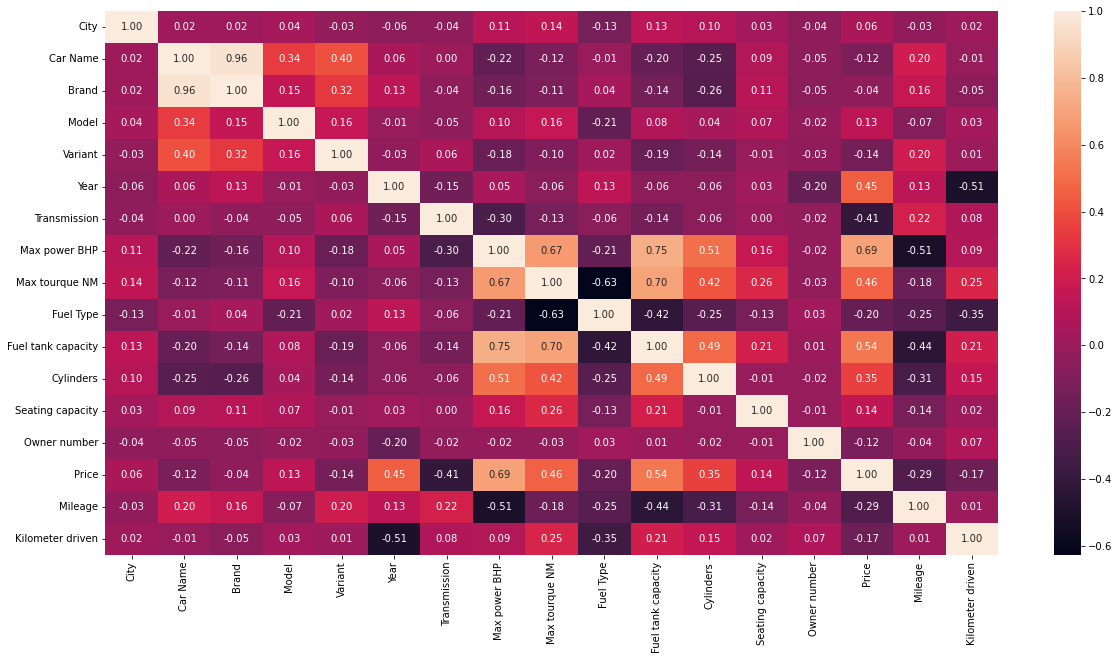

In [85]:
#Plotting the Heatmap of Correlation

corr = df_new.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='rocket',fmt='.2f')
plt.show()

* Our target is highly correlated with Max power BHP with the ration69%.
* Our target is secong most hhighly correlated with Fuel tank capacity.
* Our target is highly negatively correlated with Transmission.
* There is multicollinearity in my dataset.

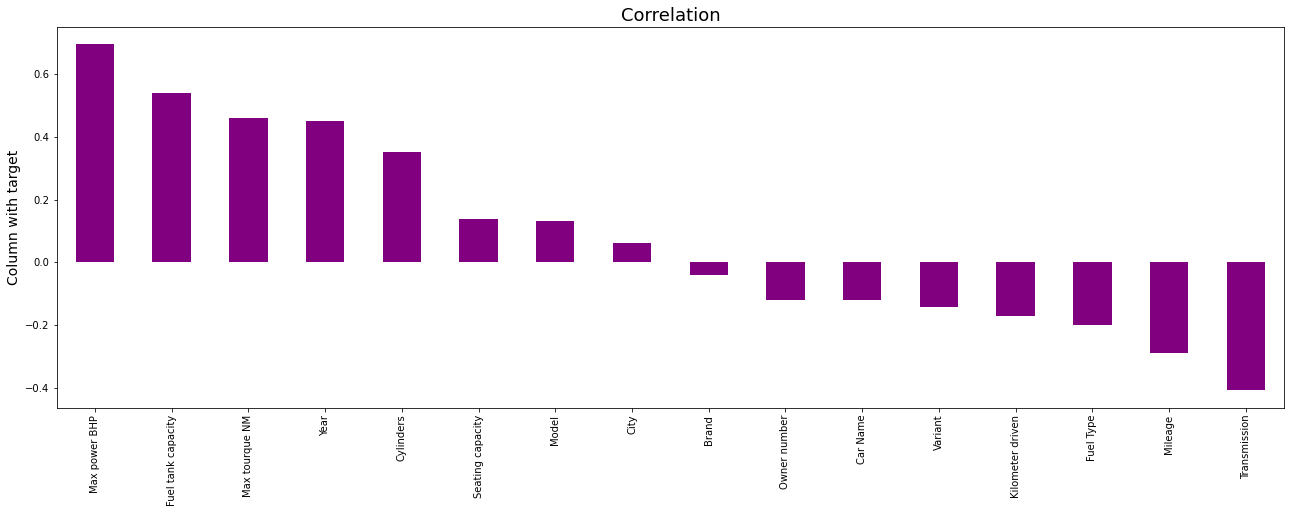

In [86]:
#Visualization of the Correlation Metrics

plt.figure(figsize=(22,7))
df_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='purple')
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

* In my dataset, Price is least correlated with City and Brand.
* We have equal number of positive and negative correlation.

## 5- Data PreProcessing

In [87]:
#Price as our target variable

x = df_new.drop("Price",axis=1)
y = df_new["Price"]

In [88]:
x.shape

(8590, 16)

In [89]:
y.shape

(8590,)

### a) Skewness

In [90]:
x.skew()

City                 -0.003182
Car Name              0.224152
Brand                 0.627871
Model                 0.371135
Variant              -0.368204
Year                 -0.606107
Transmission         -1.922292
Max power BHP         0.815562
Max tourque NM        1.883172
Fuel Type            -1.395221
Fuel tank capacity    0.836022
Cylinders            -1.112062
Seating capacity      6.956466
Owner number          1.832647
Mileage              -0.199167
Kilometer driven      0.711358
dtype: float64

* Since it is a real time data, we will take threshold as +-0.65
* We have skewness in Transmission, Max power BHP, Max tourque NM, Fuel type, Fuel tank capacity, Cylinders, Seating capacity, Owner number and Kilometers driven
* 'City','Car Name','Brand','Model','Variant','Transmission','Fuel Type','Cylinders','Seating capacity','Year','Owner number' are Categorical data, so we will not remove skewness from these.
* Numerical columns where skewness to be removed are: Max power BHP, Max tourque NM, Fuel tank capacity, Kilometer driven

In [91]:
#Removing the Skewness, 

skew_cols=['Max power BHP','Max tourque NM','Fuel tank capacity','Kilometer driven']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
x[skew_cols] = scaler.fit_transform(x[skew_cols].values)

In [92]:
#Checking skewness after removing skewness
x[skew_cols].skew()

Max power BHP         0.006346
Max tourque NM       -0.019722
Fuel tank capacity   -0.010777
Kilometer driven     -0.073331
dtype: float64

All the skewness have been removed

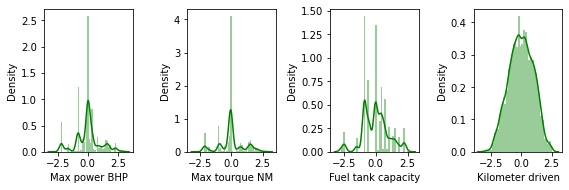

In [95]:
plt.figure(figsize=(10,10))
graph=1 

for column in x[skew_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(x[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

Our data is somewhat normally distributed

### b) Standardization

In [97]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [98]:
x.head()

,City,Car Name,Brand,Model,Variant,Year,Transmission,Max power BHP,Max tourque NM,Fuel Type,Fuel tank capacity,Cylinders,Seating capacity,Owner number,Mileage,Kilometer driven
0,-0.880692,0.872599,0.326131,1.606374,0.871746,-1.404748,0.425917,0.005418,-0.045079,0.515164,-0.020711,0.589630,-0.142527,1.650152,-0.056408,1.560340
1,-0.880692,-1.323152,-1.194257,-0.844782,0.191336,-3.109337,0.425917,1.550023,0.706547,0.515164,0.277526,0.589630,-0.142527,-0.498522,-3.189560,0.127745
2,-0.880692,-0.342906,0.934287,-0.189240,0.271699,0.725988,-2.347873,2.333494,1.990684,0.515164,2.229134,0.589630,-0.142527,-0.498522,-2.334369,-1.492668
3,-0.880692,-0.538955,-0.890179,-0.018229,-0.660516,-1.830895,0.425917,0.393306,1.729399,-1.906097,0.685797,0.589630,-0.142527,-0.498522,-1.993742,-0.252622
4,-0.880692,1.382327,1.542442,0.209785,-0.001536,0.725988,0.425917,-1.748397,-1.954294,0.515164,-2.459323,-1.691867,-0.142527,1.650152,1.666187,-0.037550


This is my dataset after standardizing.

### c) Multicollinearity

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [100]:
vif_calc()

    VIF Factor            features
0     1.042365                City
1    34.812489            Car Name
2    29.984904               Brand
3     2.534654               Model
4     1.321830             Variant
5     1.744930                Year
6     1.176357        Transmission
7     4.590361       Max power BHP
8     4.658244      Max tourque NM
9     2.623334           Fuel Type
10    3.060325  Fuel tank capacity
11    1.832918           Cylinders
12    1.113400    Seating capacity
13    1.053949        Owner number
14    2.207008             Mileage
15    1.620075    Kilometer driven


I have multicollinearity in my dataset. Since Brand is least correlated with target i will be removing Brand

In [101]:
#Droping high VIF column
x = x.drop(["Brand"],axis=1)

In [102]:
#checking vif again

vif_calc()

    VIF Factor            features
0     1.042221                City
1     1.461004            Car Name
2     1.292004               Model
3     1.239026             Variant
4     1.649832                Year
5     1.168087        Transmission
6     4.514734       Max power BHP
7     4.658073      Max tourque NM
8     2.619289           Fuel Type
9     2.993987  Fuel tank capacity
10    1.734508           Cylinders
11    1.108240    Seating capacity
12    1.053879        Owner number
13    2.182336             Mileage
14    1.618807    Kilometer driven


#### Multicollinearity is removed from my dataset

## 6- Model Building

### Importing Necessary libraries for Regression Problem

In [103]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### a) Linear Regression

In [104]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7315924540469922 seen for random state: 79


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [106]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))

The r2 score is: 0.7315924540469922
The mean absolute error 107967.27219660868
The mean squared error 24540667807.43114


In [107]:
#Hyperparameter tuning for Linear Regression

par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(x_train, y_train)
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best estimators: LinearRegression(normalize=False)
The best score: 0.6879967971623601
The best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [108]:
#RE INSTANTIATING WITH BEST PARAMETERS

grid_lm = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
grid_lm.fit(x_train, y_train)
y_pred1 = lm.predict(x_test)

print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))

The r2 score is: 0.7315924540469922
The mean absolute error 107967.27219660868
The mean squared error 24540667807.43114


#### Our score didnt improve after hyperparameter tuning

In [109]:
#Checking the CV Score

cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.6968351932991894


Text(0, 0.5, 'Predicted Y')

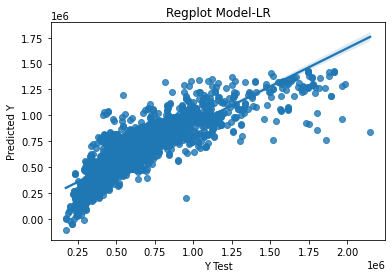

In [111]:
sns.regplot(x=y_test,y=y_pred)
plt.title("Regplot Model-LR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Regression plot of Linear regression Model

### b) Ridge Regression

In [112]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Rd = Ridge()
    Rd.fit(x_train,y_train)
    pred = Rd.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.73160012250548 seen for random state: 79


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [114]:
pred = Rd.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The r2 score is: 0.7333770327426984
The mean absolute error 107775.91304121495
The mean squared error 24377502674.3793
The cross validation score 0.6968353427680656


Text(0, 0.5, 'Predicted Y')

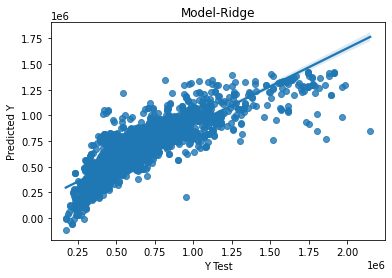

In [115]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-Ridge")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Regression plot for Ridge Model

### c) KNN Regressor

In [116]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.8789370427744135 seen for random state: 38


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [118]:
pred_knn = knn.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_knn))
print('The mean absolute error', mean_absolute_error(y_test, pred_knn))
print('The mean squared error', mean_squared_error(y_test, pred_knn))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

The r2 score is: 0.9109521824868332
The mean absolute error 54550.53504074506
The mean squared error 8448656758.045605
root_mean_squared_error: 91916.57499083396


In [120]:
#Hyperparameter tuning of KNN

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

knn = KNeighborsRegressor()
knn_grid_param={"n_neighbors": [3,5,7],
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='r2',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.9464154083476279


In [121]:
#Reinstating with best params:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
knn_H = KNeighborsRegressor(algorithm='auto',metric='manhattan',n_neighbors=3,weights='distance')
knn_H.fit(x_train,y_train)
predknn = knn_H.predict(x_test)

print('The r2 score is:', r2_score(y_test, predknn))
print('The mean absolute error', mean_absolute_error(y_test, predknn))
print('The mean squared error', mean_squared_error(y_test, predknn))

The r2 score is: 0.954545964799164
The mean absolute error 40378.30493983436
The mean squared error 4312576685.253435


#### R2 score improved well after hyperparameter tuning

Text(0, 0.5, 'Predicted Y')

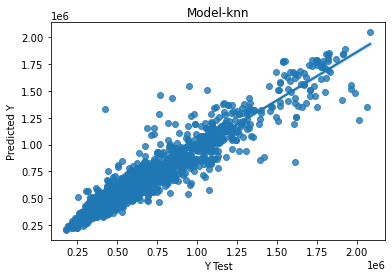

In [122]:
sns.regplot(x=y_test,y=pred_knn)
plt.title("Model-knn")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Our KNN model is having a very good accuracy and regplot is also Linear.

### d) Random Forest Regressor

In [123]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rdf = RandomForestRegressor()
    rdf.fit(x_train,y_train)
    pred = rdf.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9779259840807515 seen for random state: 38


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [125]:
pred_rdf = rdf.predict(x_test)

print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_rdf)))

The r2 score is: 0.9894158276247104
The mean absolute error 15711.477481567714
The mean squared error 1004202483.1612341
root_mean_squared_error: 31689.15403038134


In [126]:
#HyperParameter Tuning for Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV

parameters={'criterion': ["squared_error", "absolute_error", "poisson"],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8,10,30],
            'max_features':['sqrt','log2',None],
            'bootstrap': [True, False]}

g=RandomizedSearchCV(RandomForestRegressor(),param_distributions = parameters,scoring='r2',
                     cv = 5, n_iter = 10, n_jobs=-1)
g.fit(x_train,y_train)
pred_g=g.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_g))
print("\n The best estimator across ALL searched params:\n", g.best_estimator_)
print("\n The best score across ALL searched params:\n", g.best_score_)
print("\n The best parameters across ALL searched params:\n",g.best_params_)

The r2 score is: 0.9758718982191056

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=200)

 The best score across ALL searched params:
 0.9477883404912678

 The best parameters across ALL searched params:
 {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'squared_error', 'bootstrap': True}


In [128]:
rdf_H = RandomForestRegressor(max_depth=30,max_features='sqrt',bootstrap= True,
                            criterion='squared_error',n_estimators=200)
rdf_H.fit(x_train,y_train)
predrdf = rdf_H.predict(x_test)
print('The r2 score is:', r2_score(y_test, predrdf))
print('The mean absolute error', mean_absolute_error(y_test, predrdf))
print('The mean squared error', mean_squared_error(y_test, predrdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,predrdf)))

The r2 score is: 0.9753328028795336
The mean absolute error 29756.904531915796
The mean squared error 2340368214.224409
root_mean_squared_error: 48377.35228621353


#### My score didnt improve after hyperparameter tuning

Text(0, 0.5, 'Predicted Y')

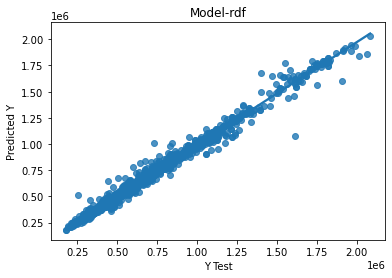

In [129]:
sns.regplot(x=y_test,y=pred_rdf)
plt.title("Model-rdf")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Our R2 score is excellent and regplot is linear

### e) XGB Regressor

In [130]:
from xgboost import XGBRegressor

#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    XGB=XGBRegressor()
    XGB.fit(x_train,y_train)
    xgb_pred=XGB.predict(x_test)
    acc = r2_score(y_test, xgb_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9776582709172186 seen for random state: 86


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [132]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
xgb_pred=XGB.predict(x_test)
print('The r2 score is:', r2_score(y_test,xgb_pred))
print('The mean squared error', mean_squared_error(y_test,xgb_pred))
print('The mean absolute error', mean_absolute_error(y_test,xgb_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,xgb_pred)))

The r2 score is: 0.9776582709172186
The mean squared error 2210177566.589745
The mean absolute error 30220.357210419093
root_mean_squared_error: 47012.525635087346


In [133]:
param_grid = dict(learning_rate=[0.01, 0.03, 0.05, 0.1], max_depth=[5, 7, 10], 
                  n_estimators=[100, 200,300],gamma=[0.05, 0.5],
                  reg_alpha=[0, 0.5],reg_lambda=[1, 0])

model = XGBRegressor(random_state=max_RS, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2')

best_model = grid_search.fit(x_train, y_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 1}


In [134]:
XGB_H=XGBRegressor(learning_rate=0.1,max_depth=7,n_estimators=300,
                   reg_alpha=0.5,reg_lambda=1,gamma=0.05)
XGB_H.fit(x_train,y_train)
xgbpred=XGB_H.predict(x_test)
print('The r2 score is:', r2_score(y_test,xgbpred))
print('The mean squared error', mean_squared_error(y_test,xgbpred))
print('The mean absolute error', mean_absolute_error(y_test,xgbpred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,xgbpred)))

The r2 score is: 0.9804031840462478
The mean squared error 1938634330.2744417
The mean absolute error 26775.886623253784
root_mean_squared_error: 44029.925394831655


#### Score has improved after hyper parameter tuning

Text(0, 0.5, 'Predicted Y')

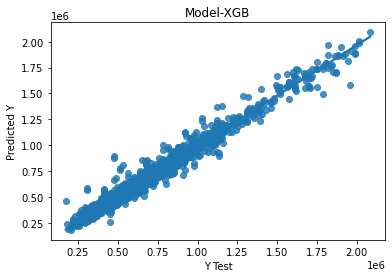

In [135]:
sns.regplot(x=y_test,y=xgb_pred)
plt.title("Model-XGB")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### The regplot is linear and score is excellent. The error is also lesser compared to other models

### f) SGD Regressor

In [136]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    sgd=SGDRegressor()
    sgd.fit(x_train,y_train)
    pred=sgd.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7318583222876467 seen for random state: 79


In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [138]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())
print('The mean squared error', mean_squared_error(y_test,pred))
print('The mean absolute error', mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.7310412370026782
The cross validation score 0.6964125051540565
The mean squared error 24591065922.455364
The mean absolute error 107521.92049880512
root_mean_squared_error: 156815.38802826515


Text(0, 0.5, 'Predicted Y')

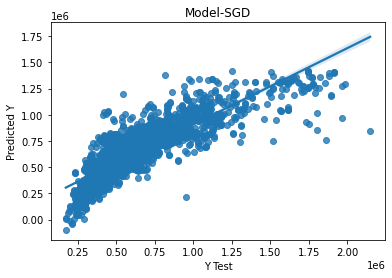

In [139]:
sns.regplot(x=y_test,y=pred)
plt.title("Model-SGD")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Score is 73% and the regplot is not linear

### g) Gradient Boosting Regressor

In [140]:
#Selecting the best random state to get maximum accuracy.

from sklearn.ensemble import GradientBoostingRegressor
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    GBR=GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred=GBR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9120397429785536 seen for random state: 38


In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_RS)

In [142]:
pred_gbr=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_gbr))
print('mean_squared_error:',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error:',mean_absolute_error(y_test,pred_gbr))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_score: 0.9182478285630363
mean_squared_error: 7756462257.973682
mean_absolute_error: 58283.46650978628
root_mean_squared_error: 88070.77981926629


In [143]:
#Hyper parameter tuning for Gradient Boosting Regressor

params = {"n_estimators" : np.linspace(100,500,5, dtype = int),
          "subsample" : [0.2, 0.5, 0.8, 1.0],
          "min_samples_leaf" : [0.01],
          "random_state" : [27],
          "ccp_alpha" : [0, 0.1,0.2,0.3]}
model = GradientBoostingRegressor(random_state=max_RS)

grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           scoring='r2')

grid_search.fit(x_train, y_train)
print("\n The best estimator across ALL searched params:\n", grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)


 The best estimator across ALL searched params:
 GradientBoostingRegressor(ccp_alpha=0, min_samples_leaf=0.01, n_estimators=500,
                          random_state=27)

 The best score across ALL searched params:
 0.9330287248909317

 The best parameters across ALL searched params:
 {'ccp_alpha': 0, 'min_samples_leaf': 0.01, 'n_estimators': 500, 'random_state': 27, 'subsample': 1.0}


In [144]:
#Reinstating with tuned parameters:
GBR_H=GradientBoostingRegressor(ccp_alpha=0,min_samples_leaf=0.01,n_estimators=500,
                               random_state=27,subsample=1.0)
GBR_H.fit(x_train,y_train)
predgbr=GBR_H.predict(x_test)
print('R2_score:',r2_score(y_test,predgbr))
print('mean_squared_error:',mean_squared_error(y_test,predgbr))
print('mean_absolute_error:',mean_absolute_error(y_test,predgbr))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,predgbr)))

R2_score: 0.9532958060961026
mean_squared_error: 4431188932.810062
mean_absolute_error: 44146.59763280022
root_mean_squared_error: 66567.17609159985


#### Our score is improved after hyperparameter tuning

Text(0, 0.5, 'Predicted Y')

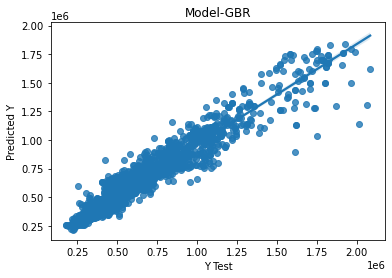

In [145]:
sns.regplot(x=y_test,y=pred_gbr)
plt.title("Model-GBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Regplot is linear and good

## Cross Validation

In [146]:
cv = cross_val_score(lm, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.6968351932991894


In [147]:
cv = cross_val_score(Rd, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.6968353427680656


In [148]:
cv = cross_val_score(rdf, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.9704991901546685


In [149]:
cv = cross_val_score(sgd, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.6961646646094336


In [154]:
cv = cross_val_score(XGB_H, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.9752155134770613


In [151]:
cv = cross_val_score(knn_H, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.9464154083476279


In [155]:
cv = cross_val_score(GBR_H, x,y,cv=5)
print('The cross validation score', cv.mean())

The cross validation score 0.9353157365385949


In [160]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             RandomForestRegressor(),
             SGDRegressor(),  
             XGBRegressor(),
             KNeighborsRegressor(),
             GradientBoostingRegressor()]
            


names = ['LR','Rd','rdf','sgd','xgb','knn','gbr']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 29005473769.786835, 3874417741.080686
Rd    : 29005448231.720238, 3874474597.926577
rdf    : 2814140692.704511, 1758305154.922164
sgd    : 28964653920.865204, 3768635557.394060
xgb    : 2852659470.032212, 1548208205.357705
knn    : 13556041195.302481, 1809069624.665854
gbr    : 11470083814.546719, 2629766649.389140


**We have Excellent R2 score and Cross-Val score for 4 of the models.**

* knn_h
    * The r2 score is: 0.954545964799164
    * The mean absolute error 40378.30493983436
    * The mean squared error 4312576685.253435
    * The cross validation score 0.9464154083476279

* Rdf
    * The r2 score is: 0.9894158276247104
    * The mean absolute error 15711.477481567714
    * The mean squared error 1004202483.1612341
    * The cross validation score 0.9704991901546685

* xgb_h
    * The r2 score is: 0.9804031840462478
    * The mean squared error 1938634330.2744417
    * The mean absolute error 26775.886623253784
    * root_mean_squared_error: 44029.925394831655
    * The cross validation score 0.9752155134770613

* Gbr_h
    * R2_score: 0.9532958060961026
    * mean_squared_error: 4431188932.810062
    * mean_absolute_error: 44146.59763280022
    * root_mean_squared_error: 66567.17609159985
    * The cross validation score 0.9353157365385949

### As we can see all the models have excellent R2 score and CV Score. But the MSE, RMSE and MAE are very high. From above models, I am taking Random Forest model as it is slightly better in terms of Errors.

In [156]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Final_model = RandomForestRegressor()
    Final_model.fit(x_train,y_train)
    pred = Final_model.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.9768841589908341 seen for random state: 38


In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)
pred_rdf = Final_model.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_rdf)))

The r2 score is: 0.9898587881955153
The mean absolute error 15583.313232440823
The mean squared error 962175379.9194716
root_mean_squared_error: 31018.9519474703


## Saving the Model

In [158]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_model,"Used_Car_Price.pkl")

['Used_Car_Price.pkl']

## Predictions

In [164]:
#load the model
model=joblib.load("Used_Car_Price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([710168.  , 810558.8 , 419066.26, ..., 443088.9 , 990352.9 ,
       883520.  ])

In [165]:
#saving the predicted values and actual values in a dataframe

base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction

In [166]:
base

,actual,predictions
2621,702999,710168.00
7440,817599,810558.80
7871,419599,419066.26
4415,1505099,1521781.00
237,692599,690689.00
...,...,...
7479,951599,997516.90
5225,716699,648837.70
7422,440409,443088.90
3673,980599,990352.90


## Actual Vs Predicted Plot

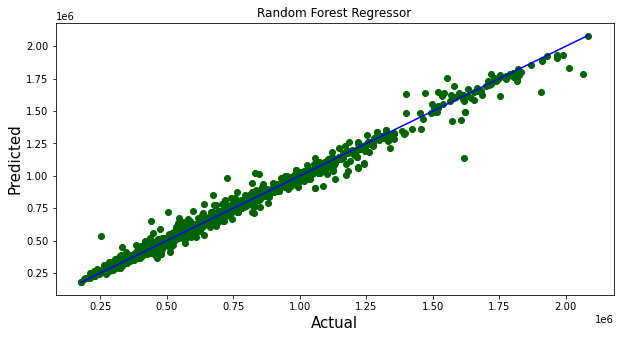

In [169]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='darkgreen')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Random Forest Regressor")
plt.show()

### The actual Vs Predicted Plot is Linear and not much diverse points.

# DONE